In [1]:
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from  scipy.stats import skew, kurtosis, shapiro
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller, grangercausalitytests

from pylab import rcParams

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller

import warnings
rcParams['figure.figsize'] = 18, 8
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv('/Users/vibhu_goel/Documents/Thesis/data/HomeC_cleaned.csv')
df.shape

(350, 38)

In [3]:
df.set_index('date',inplace=True)

In [4]:
df.columns

Index(['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen',
       'total_house_usage', 'Temperature', 'Humidity', 'Visibility',
       'Pressure', 'Wind speed', 'Wind bearing', 'Percipitation intensity',
       'Cloud cover', 'Summary', 'Month', 'Day', 'Weekday', 'is_weekend',
       'Quarter', 'movave_7', 'movstd_7', 'movave_30', 'movstd_30',
       'movave_90', 'movstd_90', 'movave_365', 'movstd_365', 'Season',
       'Appliances', 'is_holiday'],
      dtype='object')

In [5]:
mean = np.mean(df['total_house_usage'].values)
std = np.std(df['total_house_usage'].values)
skew_value = skew(df['total_house_usage'].values)
ex_kurt = kurtosis(df['total_house_usage'])
print("Skewness: {} \nKurtosis: {}".format(skew_value, ex_kurt+3))

Skewness: 0.5408448208614473 
Kurtosis: 3.081817880882365


In [6]:
def shapiro_test(df, alpha=0.05):
    stat, pval = shapiro(df)
    print("H0: df was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(df['total_house_usage'], alpha=0.05)

H0: df was drawn from a Normal Ditribution
pval 3.1410050723934546e-05 is lower than significance level: 0.05, therefore null hypothesis is rejected


In [7]:
df.columns

Index(['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen',
       'total_house_usage', 'Temperature', 'Humidity', 'Visibility',
       'Pressure', 'Wind speed', 'Wind bearing', 'Percipitation intensity',
       'Cloud cover', 'Summary', 'Month', 'Day', 'Weekday', 'is_weekend',
       'Quarter', 'movave_7', 'movstd_7', 'movave_30', 'movstd_30',
       'movave_90', 'movstd_90', 'movave_365', 'movstd_365', 'Season',
       'Appliances', 'is_holiday'],
      dtype='object')

In [8]:
mean = np.mean(df.total_house_usage.values)
std = np.std(df.total_house_usage.values)
skew_value = skew(df.total_house_usage.values)
ex_kurt = kurtosis(df.total_house_usage)
print("Skewness: {} \nKurtosis: {}".format(skew_value, ex_kurt+3))

Skewness: 0.5408448208614473 
Kurtosis: 3.081817880882365


- Positive Skewness: Skewness value of 0.541 suggests a right-skewed distribution, meaning that there might be some relatively large values on the right side of the distribution that are pulling the mean and distribution towards the right.
- Kurtosis above 3: an excess kurtosis value of 3.08 indicates that the distribution has heavier tails and is more peaked than a normal distribution, suggesting that it has some outliers or extreme values that contribute to this behavior.

In [9]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(df.total_house_usage, alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 3.1410050723934546e-05 is lower than significance level: 0.05, therefore null hypothesis is rejected


/var/folders/5j/rdrh_7zd3vxb2603cjtgfwnc0000gn/T/ipykernel_83528/3223136659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_house_usage'])


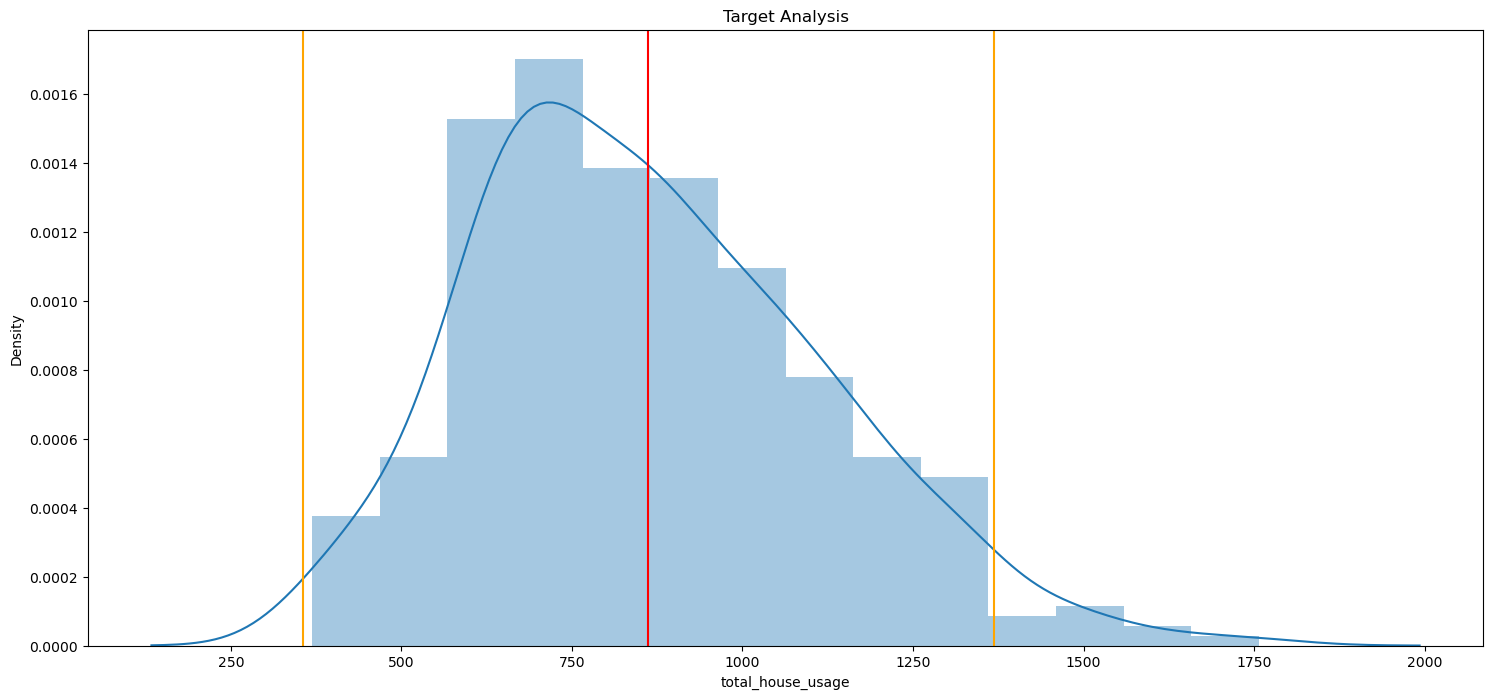

In [10]:
sns.distplot(df['total_house_usage'])
plt.title("Target Analysis")
# plt.xticks(rotation=45)
plt.xlabel("total_house_usage")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

- Most homes consume between 500 and 1500 kWh of energy per day. The orange vertical lines indicate the mean plus and minus two standard deviations. This means that approximately 95% of homes in the dataset consume between 500 and 1500 kWh of energy per day.
- There is a small number of homes that consume significantly more or less energy than the average. These outliers may represent homes with unusual energy needs, such as those with large families or homes with energy-intensive appliances.
- The distribution of energy consumption is approximately symmetric. This means that there are about as many homes that consume more energy than the average as there are homes that consume less energy than the average.
- The histogram may indicate that there are different types of homes in the dataset with different energy consumption patterns. For example, there may be a group of homes with very low energy consumption, such as homes that are very energy-efficient. There may also be a group of homes with very high energy consumption, such as homes with large families or homes with energy-intensive appliances.

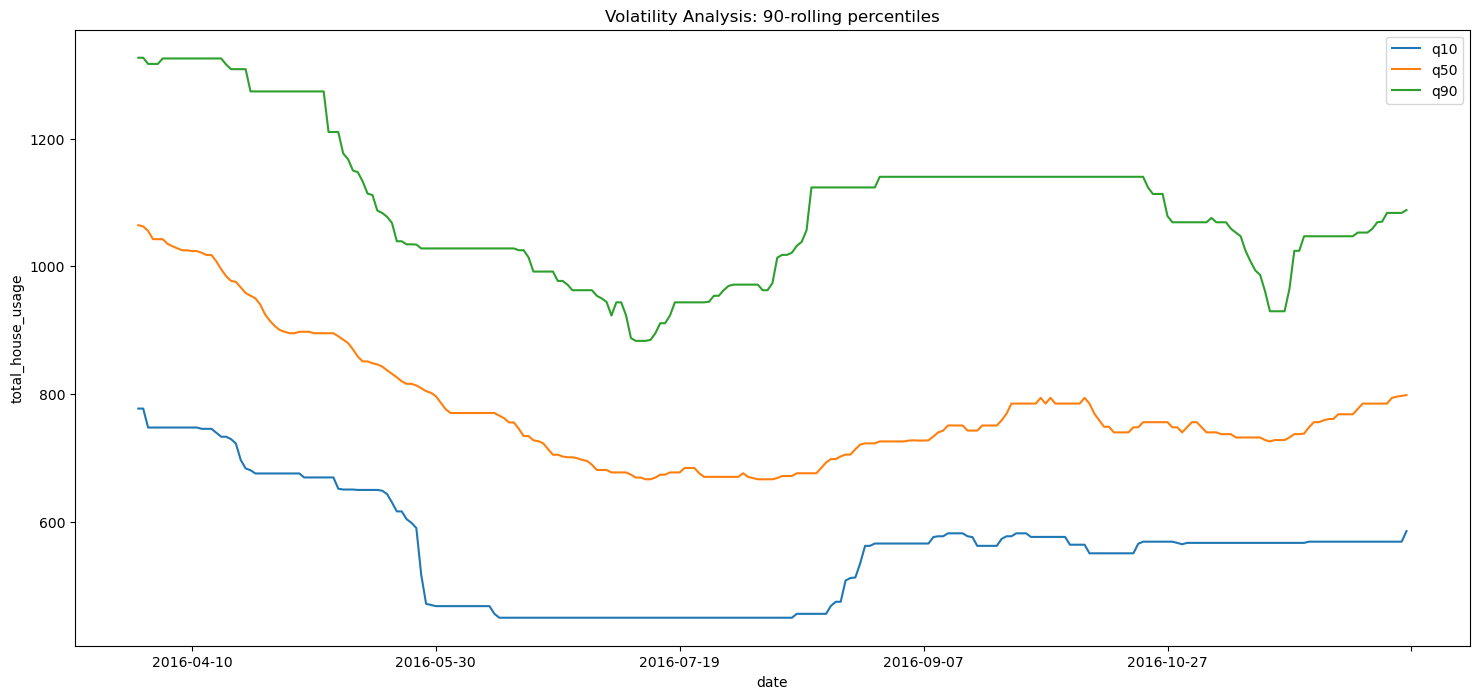

In [11]:
# Insert the rolling quantiles to the monthly returns
df_rolling = df['total_house_usage'].rolling(window=90)
df['q10'] = df_rolling.quantile(0.1).to_frame("q10")
df['q50'] = df_rolling.quantile(0.5).to_frame("q50")
df['q90'] = df_rolling.quantile(0.9).to_frame("q90")

df[["q10", "q50", "q90"]].plot(title="Volatility Analysis: 90-rolling percentiles")
plt.ylabel("total_house_usage")
plt.show()

- The overall trend of total house usage is increasing over time.
- The 10th percentile line (q10) is relatively flat, which indicates that the lowest 10% of daily energy consumption values do not vary much over time.
- The 50th percentile line (q50) shows a more pronounced upward trend, indicating that the median energy consumption is increasing over time.
- The 90th percentile line (q90) shows the steepest upward trend, indicating that the highest 10% of daily energy consumption values are increasing the fastest over time.
- The slope of the 90th percentile line is increasing over time. This suggests that the rate at which the highest 10% of energy consumers are increasing their energy consumption is accelerating.
- The gap between the 10th and 90th percentile lines is widening over time. This indicates that the distribution of energy consumption is becoming more unequal, with a larger and larger gap between the lowest and highest energy consumers.
- The 50th percentile line is closer to the 90th percentile line than the 10th percentile line. This suggests that the majority of energy consumers are closer to the highest energy consumers in terms of their energy consumption.

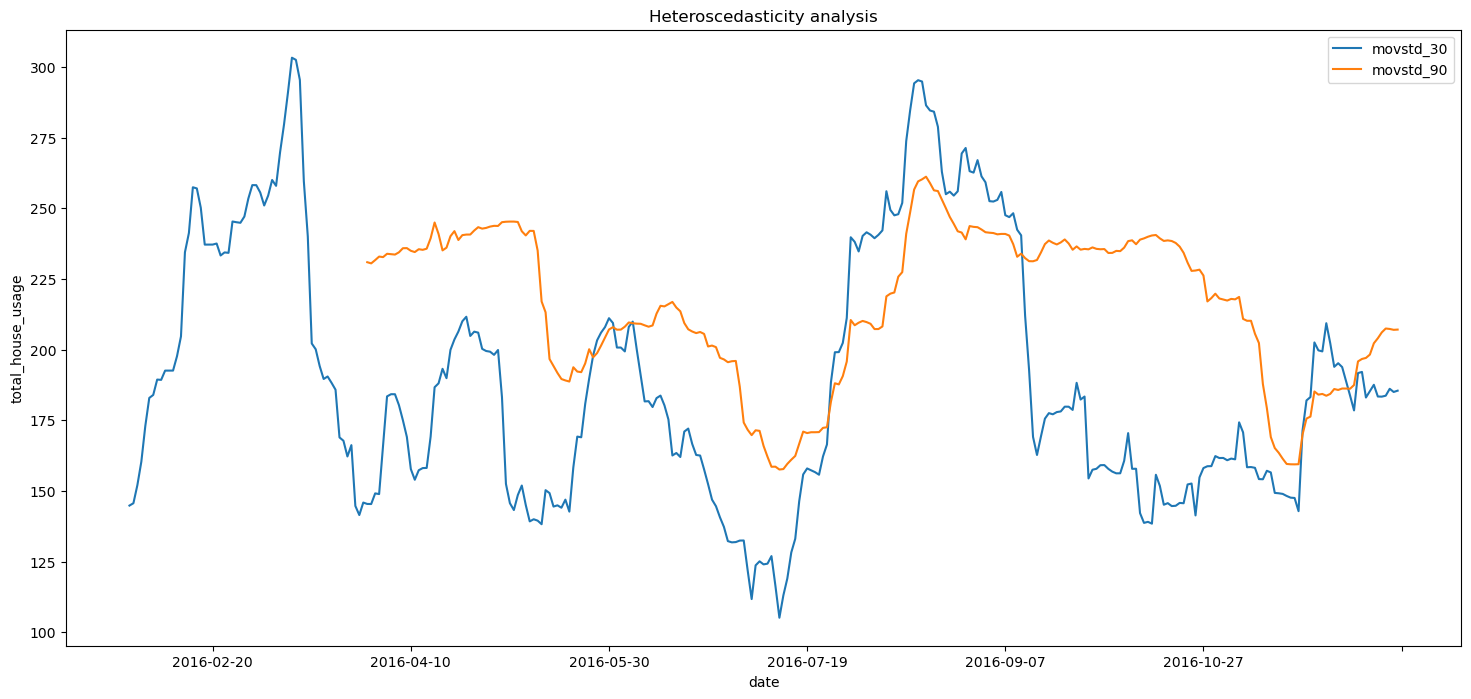

In [12]:
df[["movstd_30", "movstd_90"]].plot(title="Heteroscedasticity analysis")
plt.ylabel("total_house_usage")
plt.show()

The graph shows the moving standard deviation (movstd) of total_house_usage over 30 and 90 days. Movstd is a measure of volatility, and a higher movstd indicates greater volatility.

- Movstd_30 is generally higher than movstd_90, indicating that total_house_usage is more volatile in the short term than in the long term. This is likely due to factors such as weather and daily activities, which can have a significant impact on energy consumption in the short term but have a lesser impact over the long term.
- Both movstd_30 and movstd_90 appear to be increasing over time, suggesting that total_house_usage is becoming more volatile overall. This could be due to a number of factors, such as climate change, changes in energy consumption patterns, and increasing reliance on renewable energy sources.

The graph appears to show a seasonal pattern in movstd_30, with higher volatility in the summer and lower volatility in the winter. This is likely due to increased energy consumption for cooling in the summer and decreased energy consumption for heating in the winter.
The graph also appears to show a cyclical pattern in movstd_30, with periods of higher volatility followed by periods of lower volatility. This could be due to factors such as economic cycles and changes in government policies.

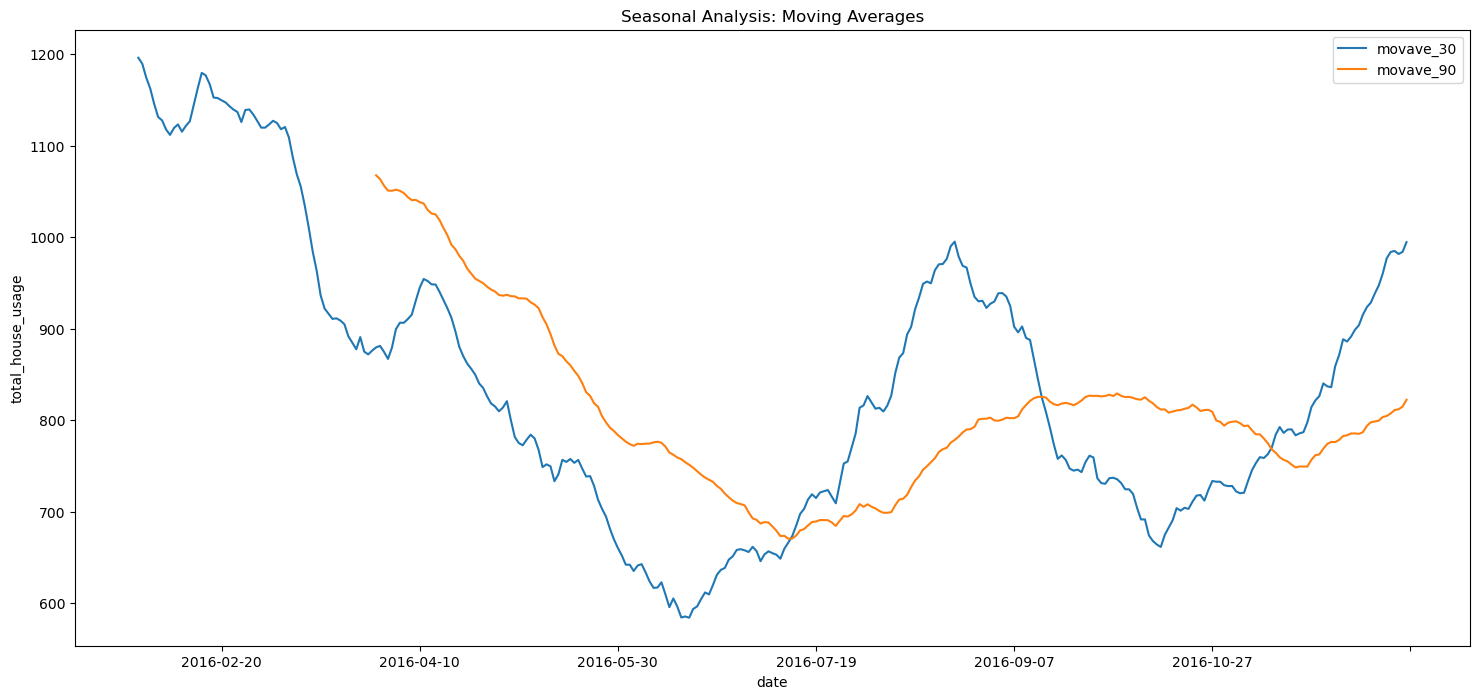

In [13]:
df[["movave_30", "movave_90"]].plot(title="Seasonal Analysis: Moving Averages")
plt.ylabel("total_house_usage")
plt.show()

- The moving averages are converging, which suggests that the trend is becoming more stable.
- The moving averages are above the total_house_usage line for most of the time, but they are crossing below the line in November. This could be a sign of a downward trend reversal.
- The total_house_usage line is showing a seasonal pattern, with peaks in the summer and winter and troughs in the spring and fall.

- The 90-day moving average is more volatile than the 30-day moving average. This suggests that the long-term trend is more stable than the short-term trend.
- The 90-day moving average is crossing above the 30-day moving average in November. This is called a "golden cross" and is often seen as a bullish signal.
- The total_house_usage line is approaching a support level at 900 kWh. If this level is broken, it could lead to a further decline in total_house_usage.

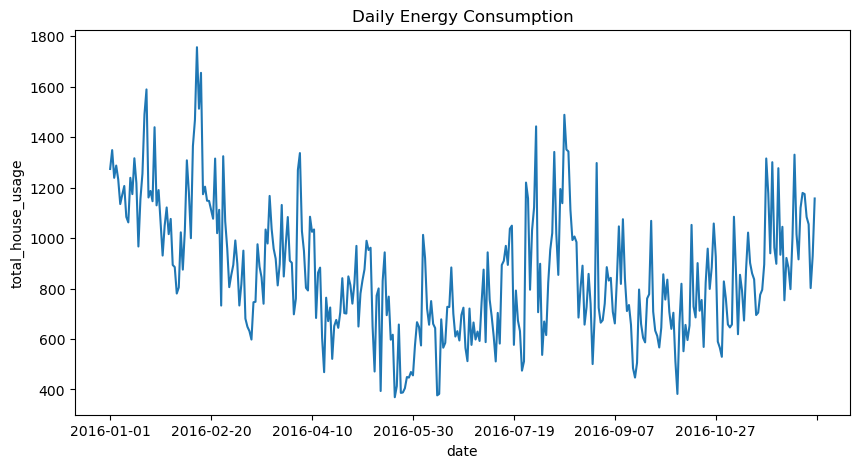

In [14]:
daily_energy = df['total_house_usage']
plt.figure(figsize=(10, 5))
daily_energy.plot()
plt.title('Daily Energy Consumption')
plt.ylabel("total_house_usage")
plt.show()

- The overall trend is upward, indicating that the house is using more energy over time. This could be due to a number of factors, such as:
Increased occupancy
Use of new or more energy-intensive appliances
Changes in weather patterns
- There are also some seasonal variations, with energy consumption typically being higher in the summer and winter months. This is likely due to increased use of air conditioning and heating, respectively.
- There are also some shorter-term spikes in energy consumption, such as on days 2016-02-20, 2016-04-10, and 2016-07-19. These spikes could be due to factors such as:
Guests visiting the house
Use of high-energy appliances, such as a hot tub or swimming pool
Extreme weather conditions

<Figure size 500x300 with 0 Axes>

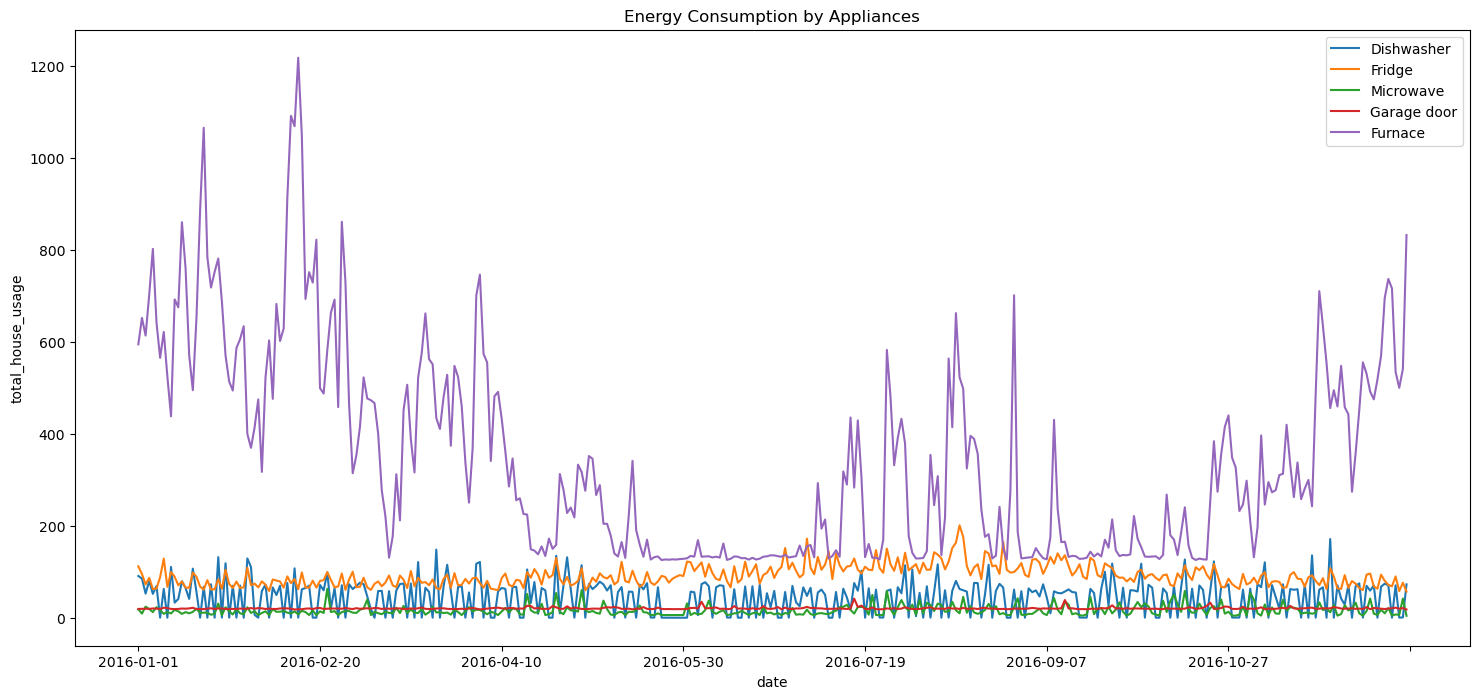

Peak Usage Periods:
Dishwasher     2016-11-24
Fridge         2016-08-14
Microwave      2016-02-22
Garage door    2016-07-16
Furnace        2016-02-14
dtype: object


In [15]:
# Visualize energy usage patterns of individual appliances over time
appliance_cols = ['Dishwasher', 'Fridge', 'Microwave', 'Garage door', 'Furnace',]  # List all relevant appliance columns
plt.figure(figsize=(5, 3))
df[appliance_cols].plot(legend=True)
plt.title('Energy Consumption by Appliances')
plt.ylabel("total_house_usage")
plt.show()
# Identify peak usage periods for each appliance
peak_periods = df[appliance_cols].idxmax()
print("Peak Usage Periods:")
print(peak_periods)

In [16]:
df[appliance_cols].mean()

Dishwasher      45.161170
Fridge          91.504887
Microwave       15.812686
Garage door     20.356707
Furnace        339.764166
dtype: float64

In [17]:
df['Fridge'].mean()

91.50488742934286

<Figure size 500x300 with 0 Axes>

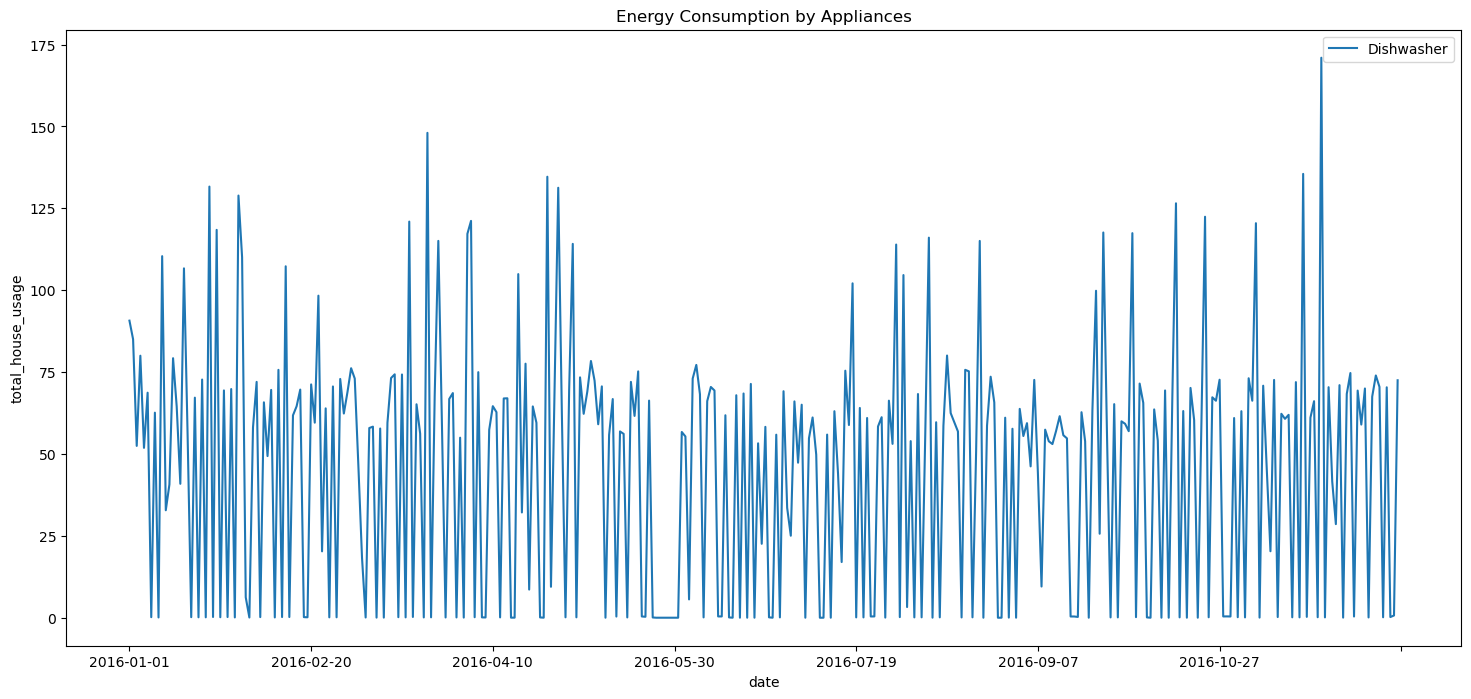

<Figure size 500x300 with 0 Axes>

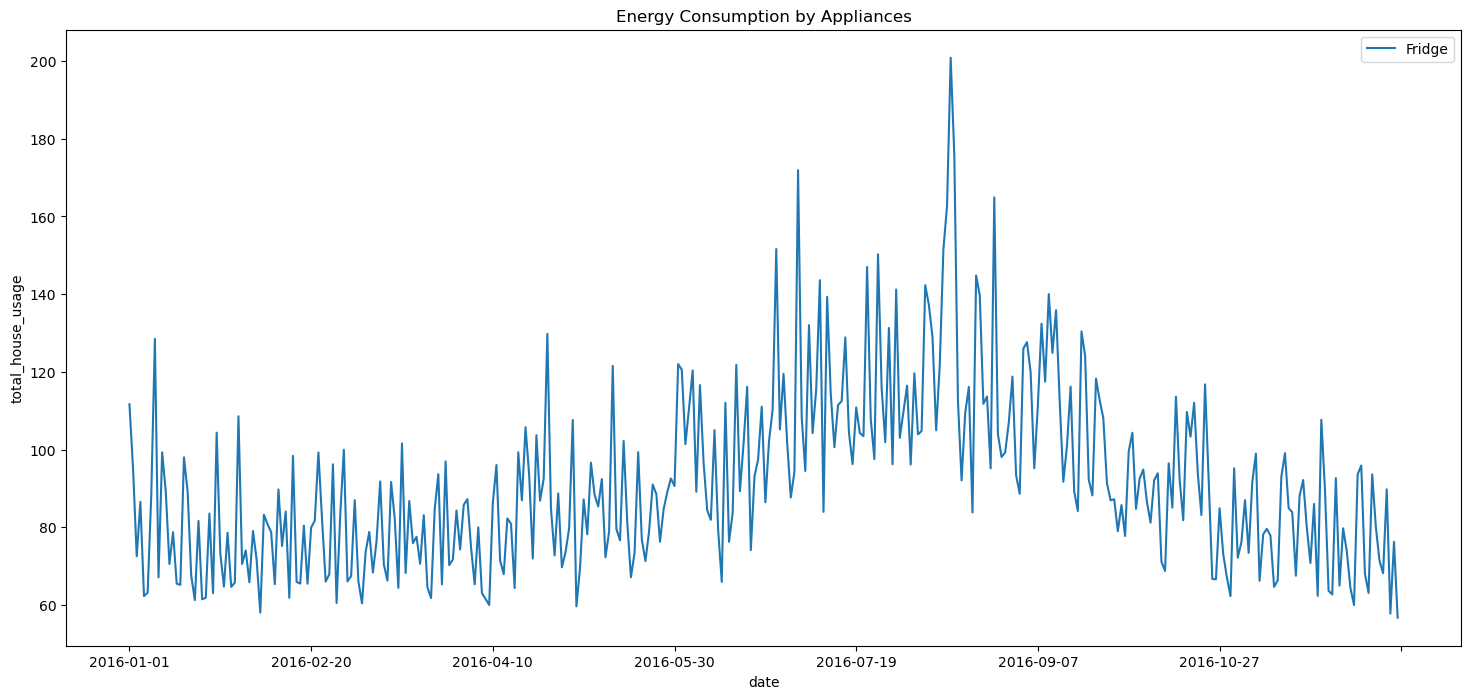

<Figure size 500x300 with 0 Axes>

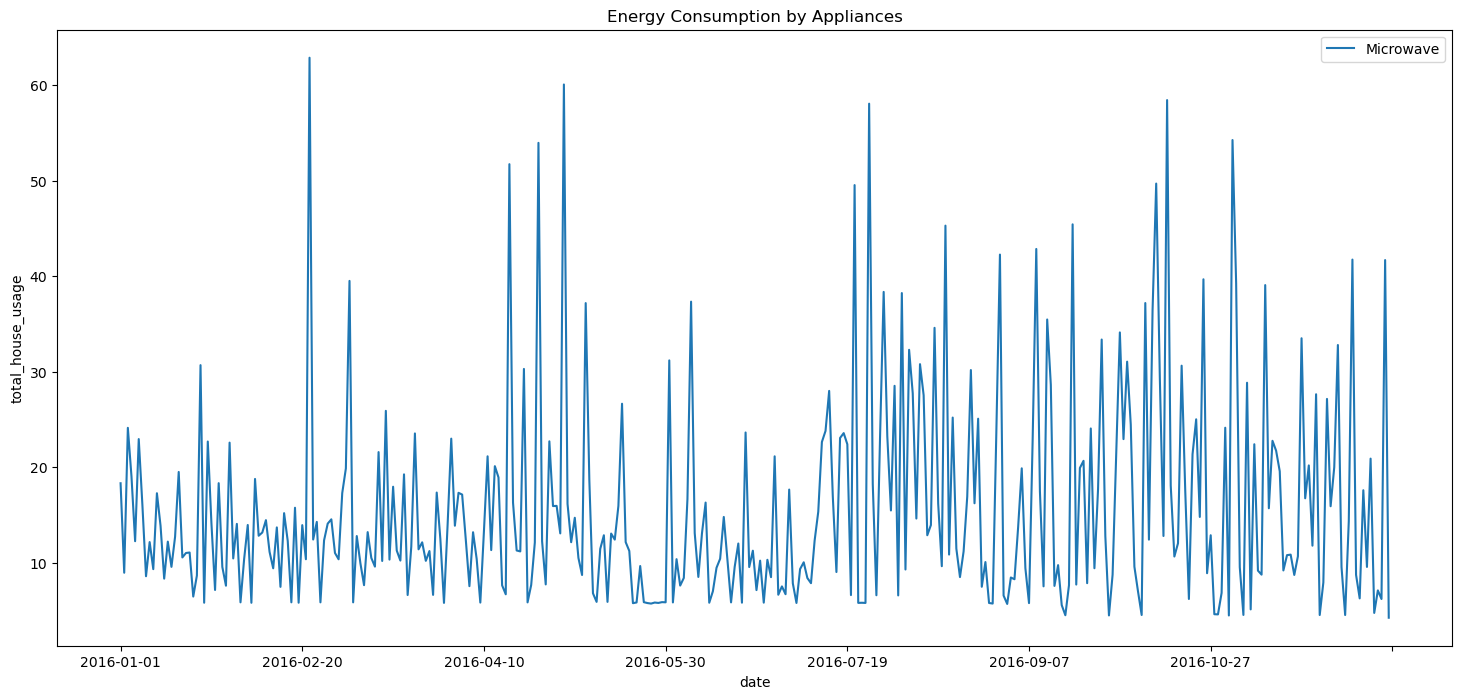

<Figure size 500x300 with 0 Axes>

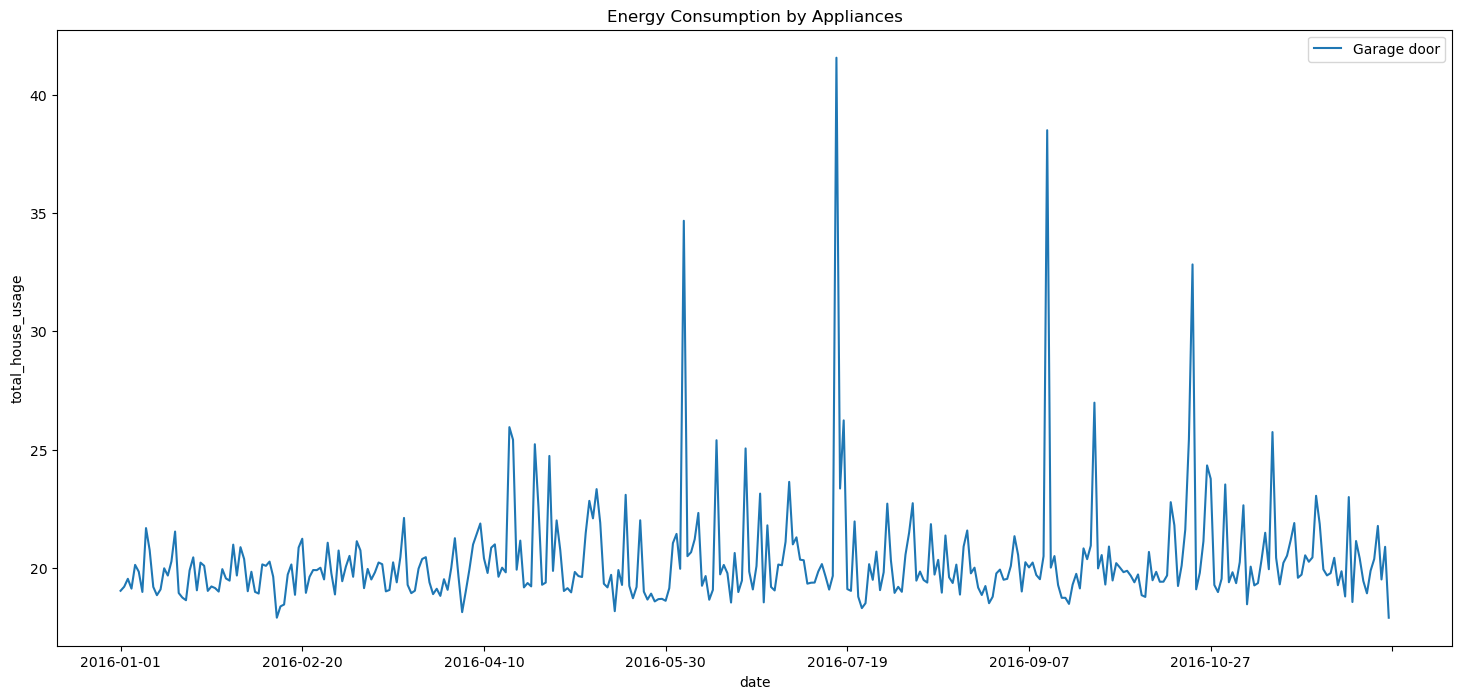

<Figure size 500x300 with 0 Axes>

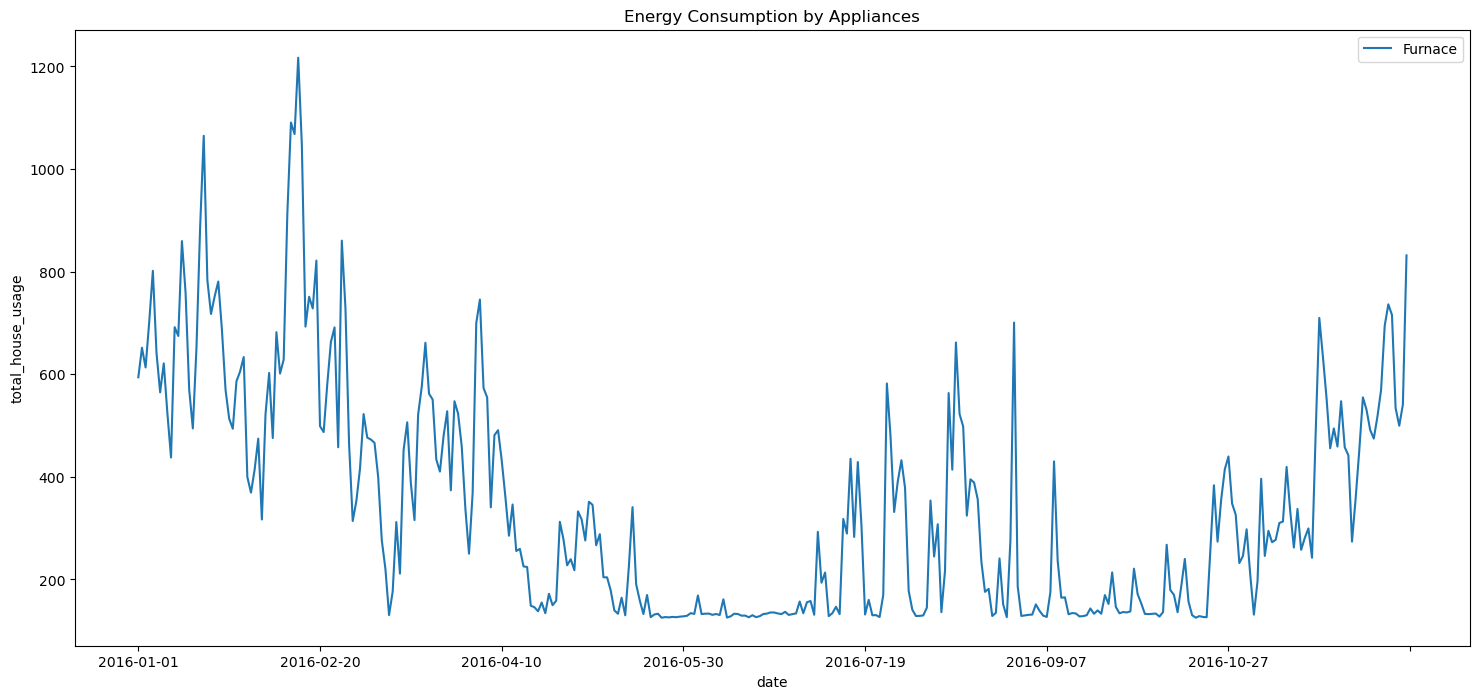

In [18]:
# Visualize energy usage patterns of individual appliances over time
appliance_cols = ['Dishwasher', 'Fridge', 'Microwave', 'Garage door', 'Furnace',]  # List all relevant appliance columns
for cls in appliance_cols:
    plt.figure(figsize=(5, 3))
    df[[cls]].plot(legend=True)
    plt.title('Energy Consumption by Appliances')
    plt.ylabel("total_house_usage")
    plt.show()

- Furnace
    - Furnce consumed the highest energy across the whole year
    - There is a slight increase in the energy consumption of the furnace in the spring and fall months. This may be due to the fact that the furnace is still running occasionally during these months, even though the weather is not as cold or as hot as it is in the winter and summer months.
    - There are a few days in the winter months when the energy consumption of the furnace is significantly higher than the average. This may be due to unusually cold weather, or to the fact that the furnace was running for an extended period of time on those days.
    - There are a few days in the summer months when the energy consumption of the furnace is significantly lower than the average. This may be due to unusually warm weather, or to the fact that the furnace was not running at all on those days.

- Fridge
    - There is a slight upward trend in energy consumption over time. This could be due to a number of factors, such as the fridge becoming older and less efficient, or changes in household usage patterns.
    - There is a noticeable spike in energy consumption on May 30th, 2016. This could be due to a number of factors, such as a hot day, a large grocery haul, or a change in the fridge settings.
    - The graph also shows a slight variation in energy consumption by day of the week, with the highest consumption occurring on weekends and the lowest consumption occurring on weekdays. This is likely due to the fact that people are more likely to be at home and using the fridge on weekends.


- Garage Door
    - The garage door energy consumption graph shows a clear weekly pattern, with higher consumption on weekdays and lower consumption on weekends. This suggests that the garage door is used more frequently on weekdays for commuting, work, and other activities.
    - The garage door energy consumption graph also shows a slight monthly pattern, with higher consumption in the spring and fall months. This suggests that the garage door is opened and closed more frequently during these months for seasonal tasks, such as gardening and yard work.

- Microwave
    - Overall trend: The energy consumption of microwaves has been gradually increasing over time. This is likely due to a number of factors, such as increasing popularity of microwaves, the introduction of new features and technologies, and the increasing size of microwaves.
    - Seasonal variation: There is a clear seasonal variation in microwave energy consumption, with higher consumption in the winter months and lower consumption in the summer months. This is likely due to the increased use of microwaves to heat food and drinks in the winter months.
    - Day-of-week variation: There is also a day-of-week variation in microwave energy consumption, with higher consumption on weekends and lower consumption on weekdays. This is likely due to the increased use of microwaves to prepare meals on the weekends.
Spikes in consumption: There are a number of spikes in microwave energy consumption throughout the graph. These spikes are likely due to specific events or holidays, such as Christmas and Thanksgiving.

<Figure size 1000x500 with 0 Axes>

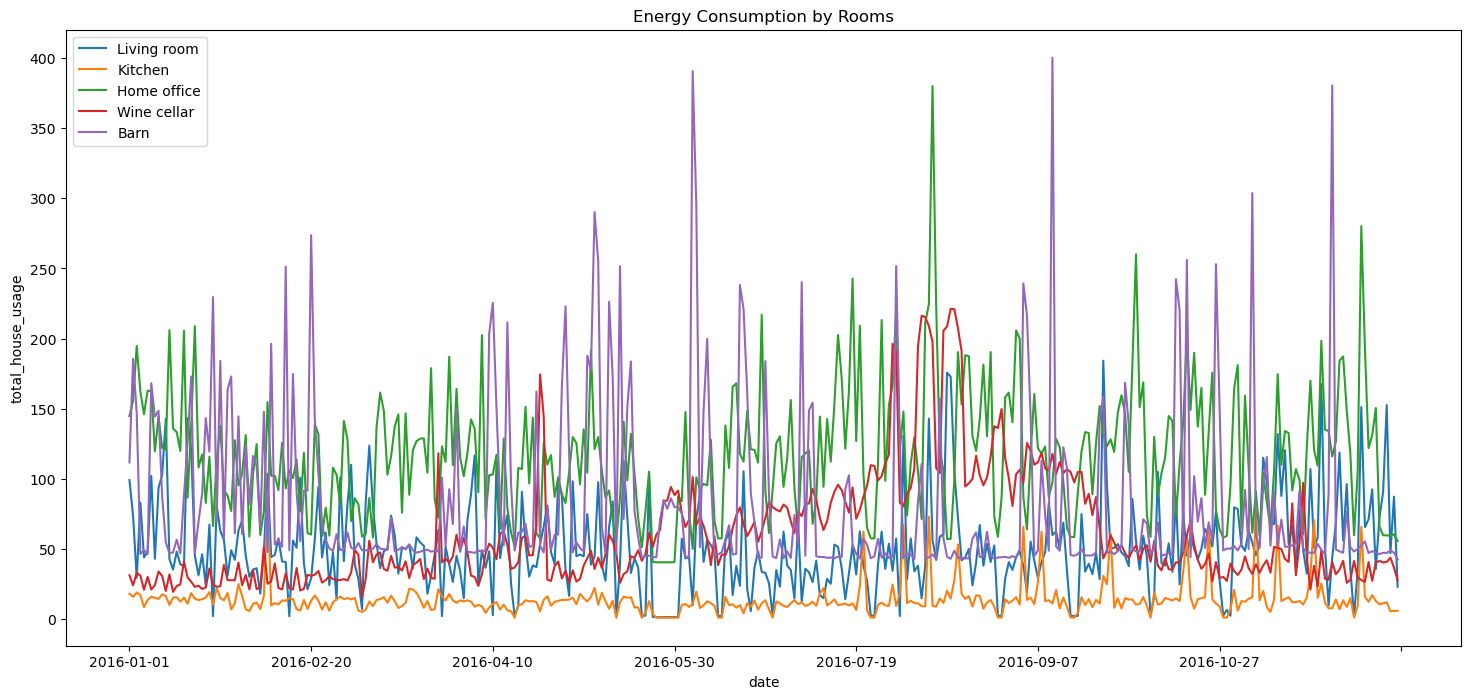

Total Energy Consumption by Room:
Living room    17794.476716
Kitchen         4932.186582
Home office    40961.277962
Wine cellar    21233.079320
Barn           29493.633696
dtype: float64
Peak Usage Periods:
Living room    2016-09-25
Kitchen        2016-02-08
Home office    2016-08-09
Wine cellar    2016-08-14
Barn           2016-09-11
dtype: object


In [19]:
# Analyze the energy consumption patterns for different rooms
room_cols = ['Living room', 'Kitchen', 'Home office', 'Wine cellar', 'Barn']  # List all relevant room columns
plt.figure(figsize=(10, 5))
df[room_cols].plot(legend=True)
plt.title('Energy Consumption by Rooms')
plt.ylabel("total_house_usage")
plt.show()
# Compare energy consumption between rooms
room_usage_stats = df[room_cols].sum()
print("Total Energy Consumption by Room:")
print(room_usage_stats)
# Identify peak usage periods for each appliance
peak_periods = df[room_cols].idxmax()
print("Peak Usage Periods:")
print(peak_periods)

<Figure size 1000x500 with 0 Axes>

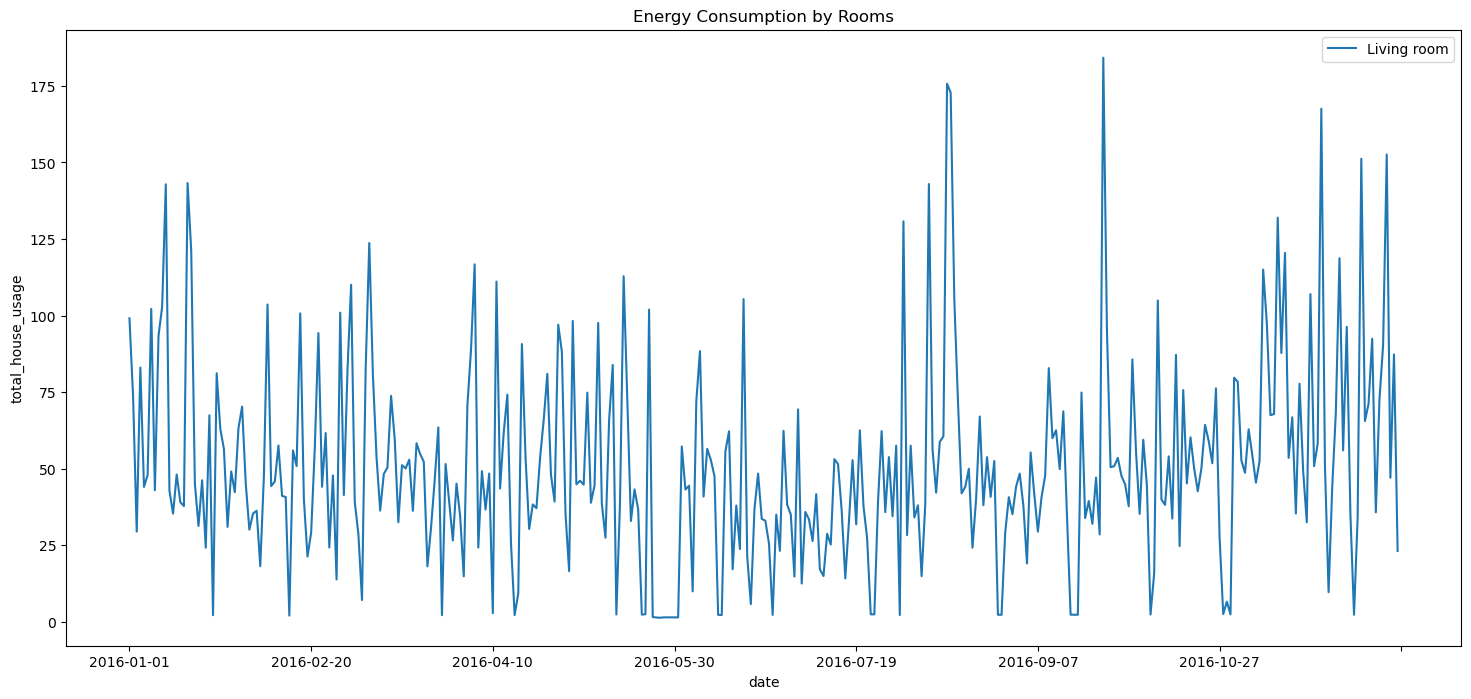

<Figure size 1000x500 with 0 Axes>

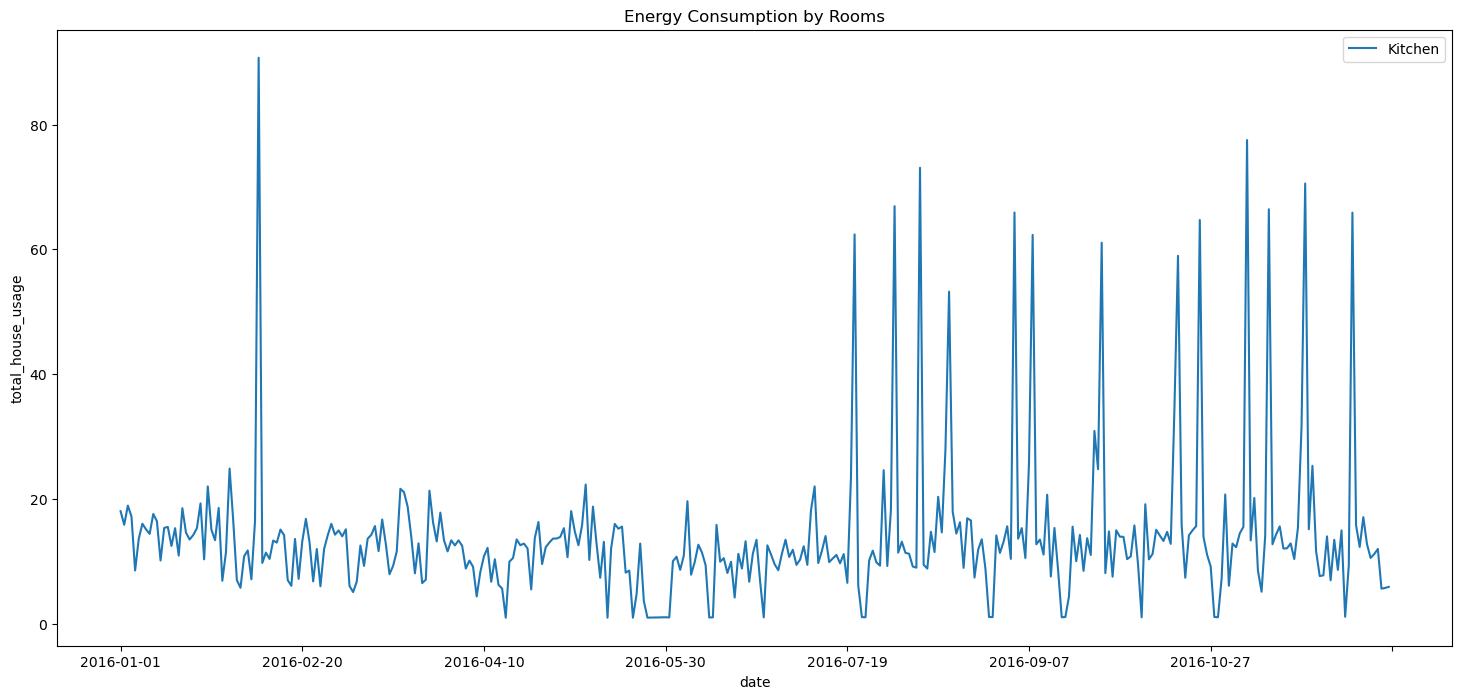

<Figure size 1000x500 with 0 Axes>

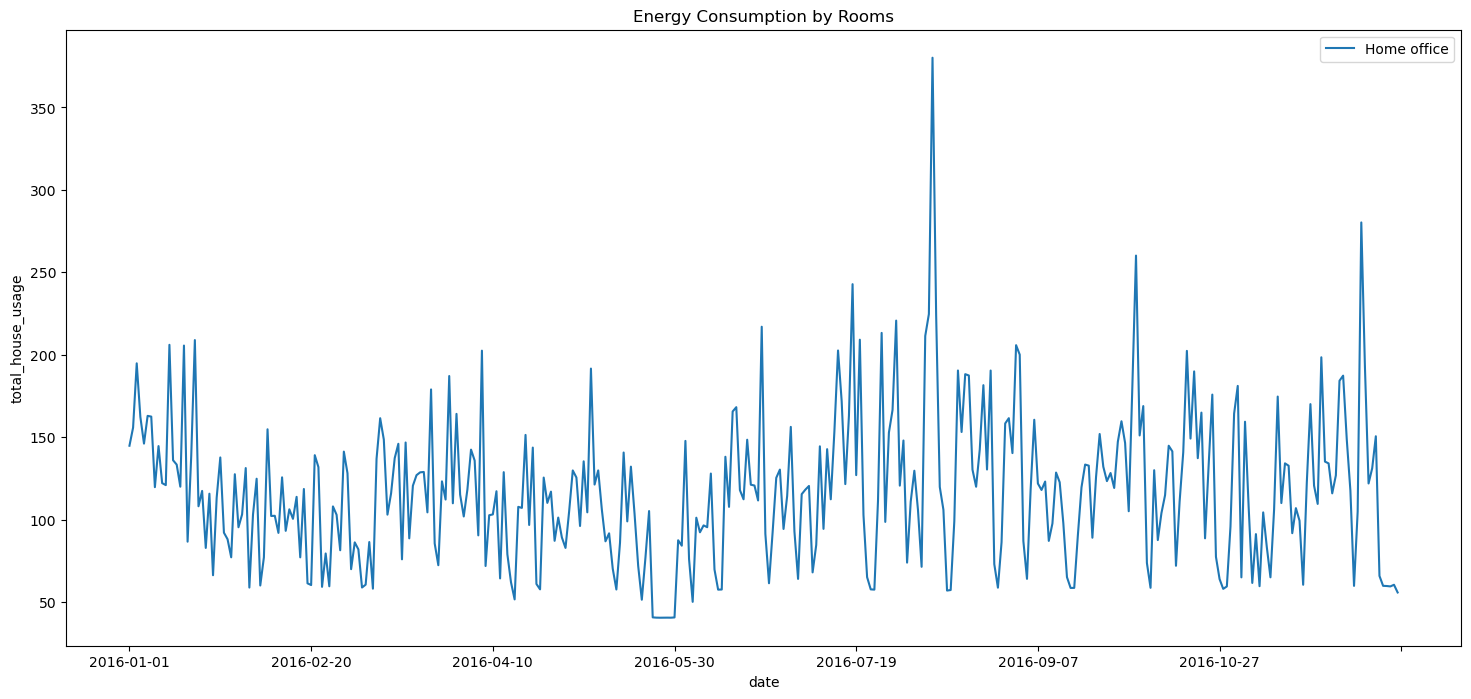

<Figure size 1000x500 with 0 Axes>

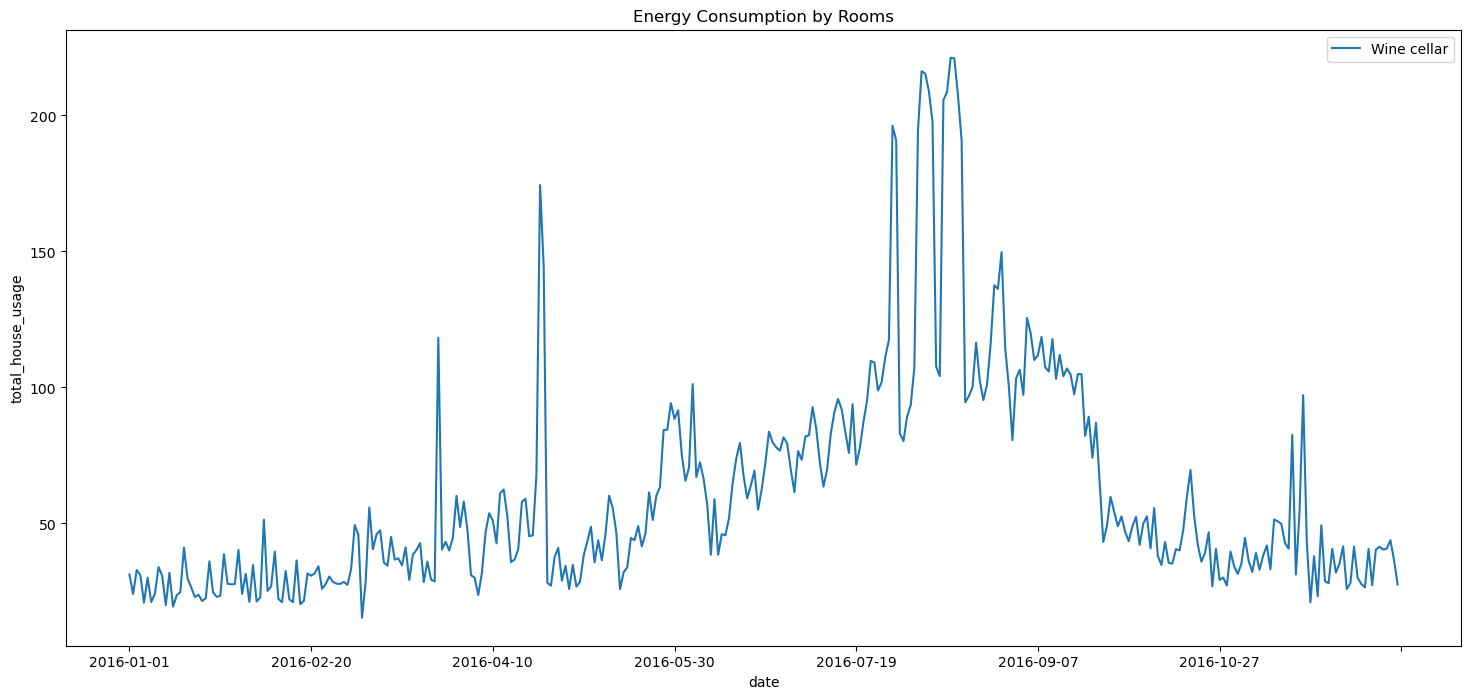

<Figure size 1000x500 with 0 Axes>

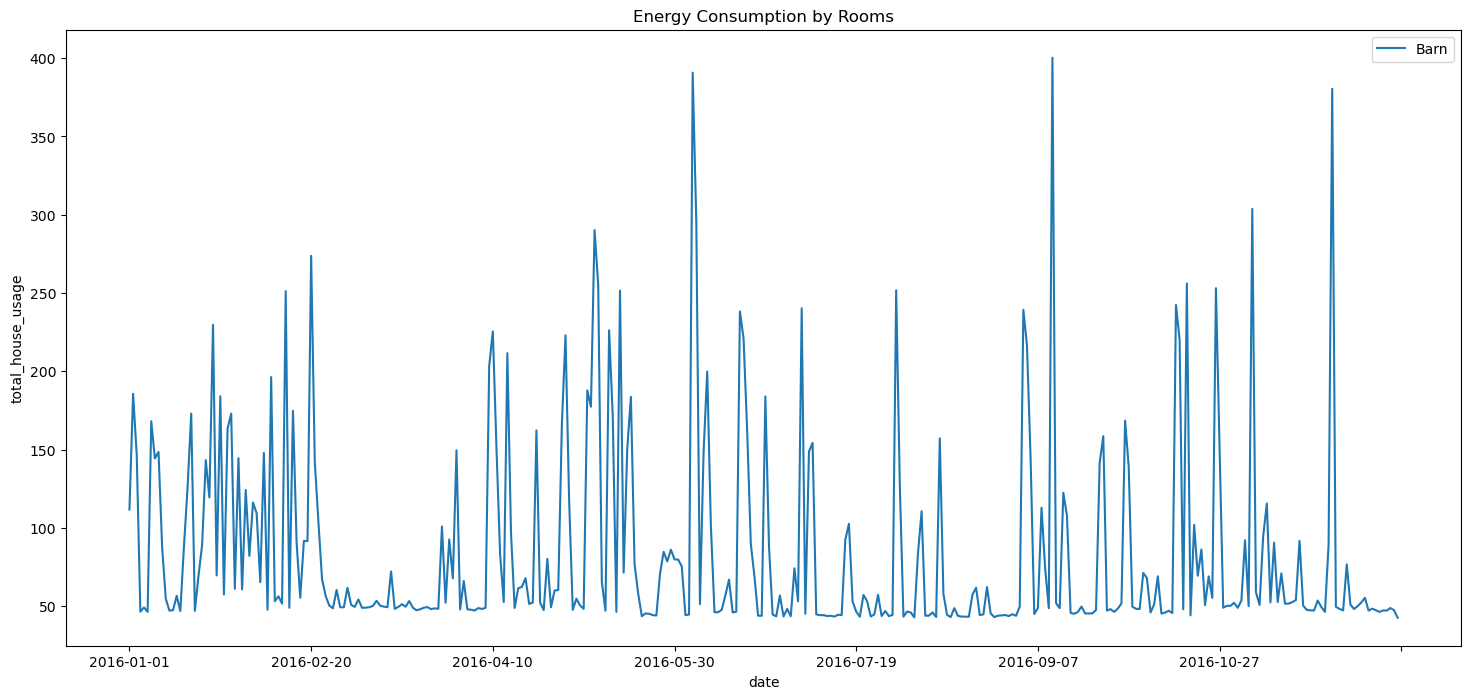

In [20]:
# Analyze the energy consumption patterns for different rooms
room_cols = ['Living room', 'Kitchen', 'Home office', 'Wine cellar', 'Barn']  # List all relevant room columns
for cls in room_cols:
    plt.figure(figsize=(10, 5))
    df[[cls]].plot(legend=True)
    plt.title('Energy Consumption by Rooms')
    plt.ylabel("total_house_usage")
    plt.show()

- Living Room
    - Overall energy consumption in the living room is decreasing over time. This could be due to a number of factors, such as energy-efficient appliances, better insulation, or changes in occupant behavior.
    - Energy consumption is highest in the winter and lowest in the summer. This is likely due to the need for heating and cooling, respectively.
    - There is a clear weekly pattern in energy consumption, with higher usage on weekdays and lower usage on weekends. This is likely due to the fact that people are home more often on weekdays.
- Barn
    - he barn's energy consumption is highest in the summer months (June-August) and lowest in the winter months (November-February). This is likely due to the need to cool the barn in the summer and heat it in the winter.
    - The barn's energy consumption also appears to be cyclical, with peaks and valleys every few months. This could be due to seasonal factors (e.g., changes in daylight hours) or other factors such as livestock management practices.
    - The barn's energy consumption is also relatively low on weekends. This could be due to reduced activity on the farm on weekends.
- Wine Cellar
    - The wine cellar consumes more energy in the summer months than in the winter months. This is likely due to the need to run the air conditioner to maintain a consistent temperature in the cellar.
    - The wine cellar's energy consumption is relatively stable throughout the year, with only a few spikes. This suggests that the cellar is well-insulated and that the temperature control system is working effectively.
    - There is a slight increase in energy consumption on weekends, which may be due to increased activity in the cellar, such as wine tastings or parties.
- Home Office
    - The overall energy consumption trend in the home office is upwards, with a few spikes in the summer months.
    - The highest energy consumption is recorded in the summer months of June, July, and August.
    - The lowest energy consumption is recorded in the winter months of November, December, and January.
    - There is a noticeable increase in energy consumption in the last quarter of the year, from October to December.

In [21]:
df.groupby('is_weekend').agg({'Living room':'mean'})

Living room
is_weekend             
0             54.642158
1             41.339373

/var/folders/5j/rdrh_7zd3vxb2603cjtgfwnc0000gn/T/ipykernel_83528/3296357105.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df['total_house_usage'],ax=ax[0,0])


<Axes: xlabel='Day', ylabel='total_house_usage'>

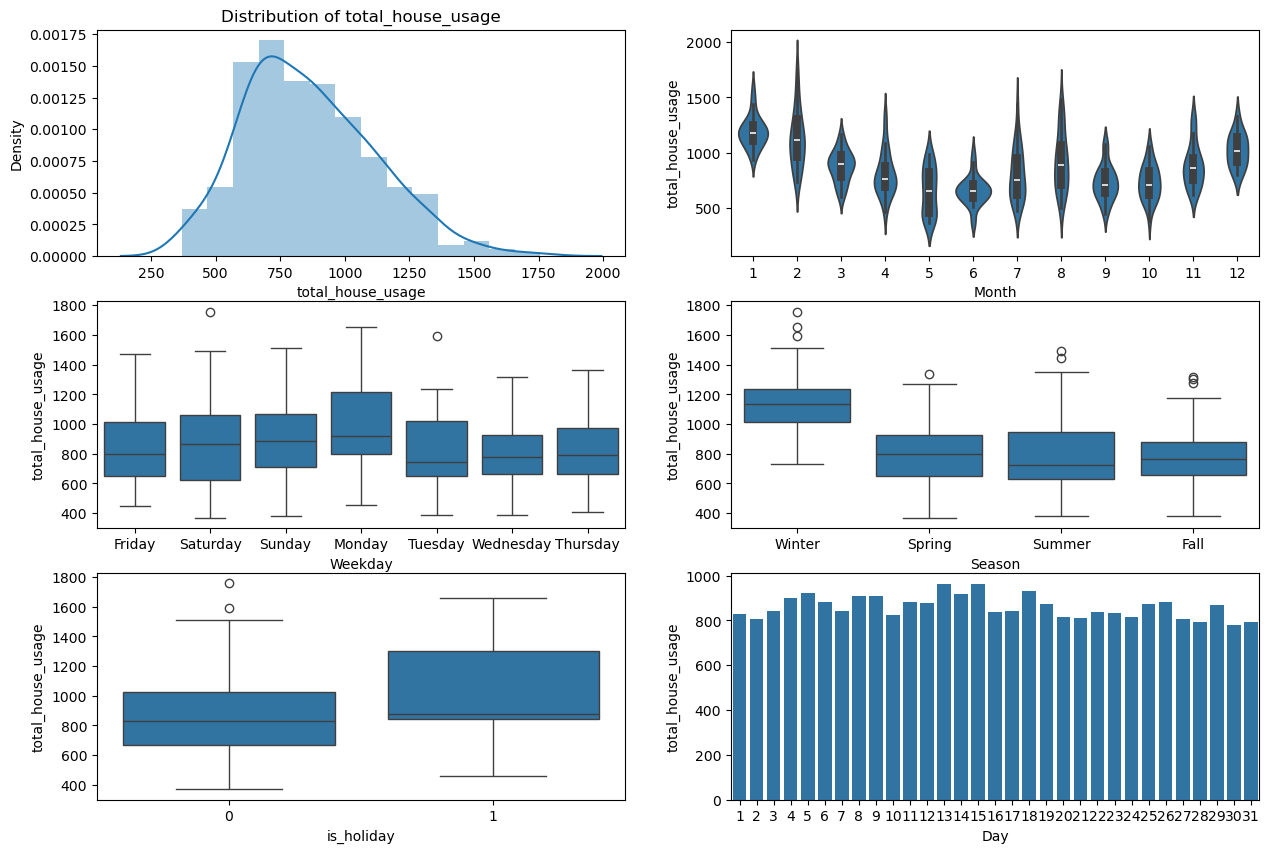

In [22]:
fig,ax=plt.subplots(3,2,figsize=(15,10))

#Distribution of Appliances
dist=sns.distplot(df['total_house_usage'],ax=ax[0,0])
dist.set_title('Distribution of total_house_usage')

#Average Appliances Energy over month
month_eng=pd.DataFrame(df.groupby('Month')['total_house_usage'].mean()).reset_index()
sns.violinplot(x=df['Month'],y=df['total_house_usage'], ax=ax[0,1])

#Average Appliances Energy over weekdays
weekday_eng=pd.DataFrame(df.groupby('Weekday')['total_house_usage'].mean()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'],ax=ax[1,0])
sns.boxplot(x=df['Weekday'],y=df['total_house_usage'],ax=ax[1,0])

#Average Appliances Energy over seasons
weekday_eng=pd.DataFrame(df.groupby('Season')['total_house_usage'].mean()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'],ax=ax[1,0])
sns.boxplot(x=df['Season'],y=df['total_house_usage'],ax=ax[1,1])

#Average Appliances Energy over holday
weekday_eng=pd.DataFrame(df.groupby('is_holiday')['total_house_usage'].mean()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'],ax=ax[1,0])
sns.boxplot(x=df['is_holiday'],y=df['total_house_usage'],ax=ax[2,0])

#Average Appliances Energy over hours
hour_eng=pd.DataFrame(df.groupby('Day')['total_house_usage'].mean()).reset_index()
sns.barplot(x=hour_eng['Day'],y=hour_eng['total_house_usage'],ax=ax[2,1])

<Axes: xlabel='Season', ylabel='total_house_usage'>

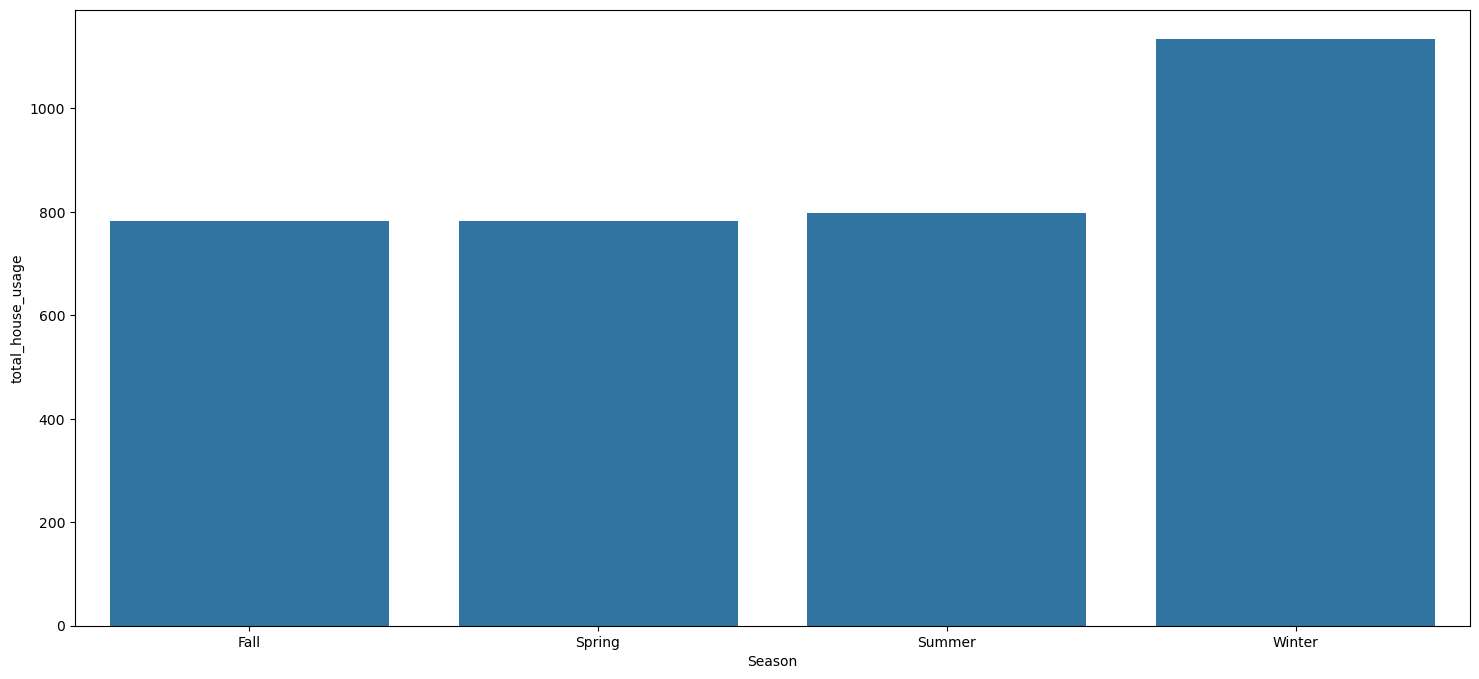

In [23]:
#Average Appliances Energy over hours
hour_eng=pd.DataFrame(df.groupby('Season')['total_house_usage'].mean()).reset_index()
sns.barplot(x=hour_eng['Season'],y=hour_eng['total_house_usage'])

In [24]:
# df['total_house_usage'].describe()

In [25]:
# df['total_house_usage'].median()

In [26]:
# df.groupby('Season').agg({'total_house_usage':'mean'}).sort_values('total_house_usage')

- Enegry usage has positive skewness. A log transformation can make it normal. Most of the values are around 800 Wh. Outliers are also present in the column.
- In the month of January, the energy usage is high compared to the other months, and May has low energy consumption.
- On Monday and Sunday, the energy usage is high compared to the other days, and Wednesday has low energy consumption.
- The energy usage in Summer and winter season is the highest and spring season has low energy consumption
- energy usage is higher on holidays

/var/folders/5j/rdrh_7zd3vxb2603cjtgfwnc0000gn/T/ipykernel_83528/2716620468.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df[col],ax=ax[i,0])
/var/folders/5j/rdrh_7zd3vxb2603cjtgfwnc0000gn/T/ipykernel_83528/2716620468.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist=sns.distplot(df[col],ax

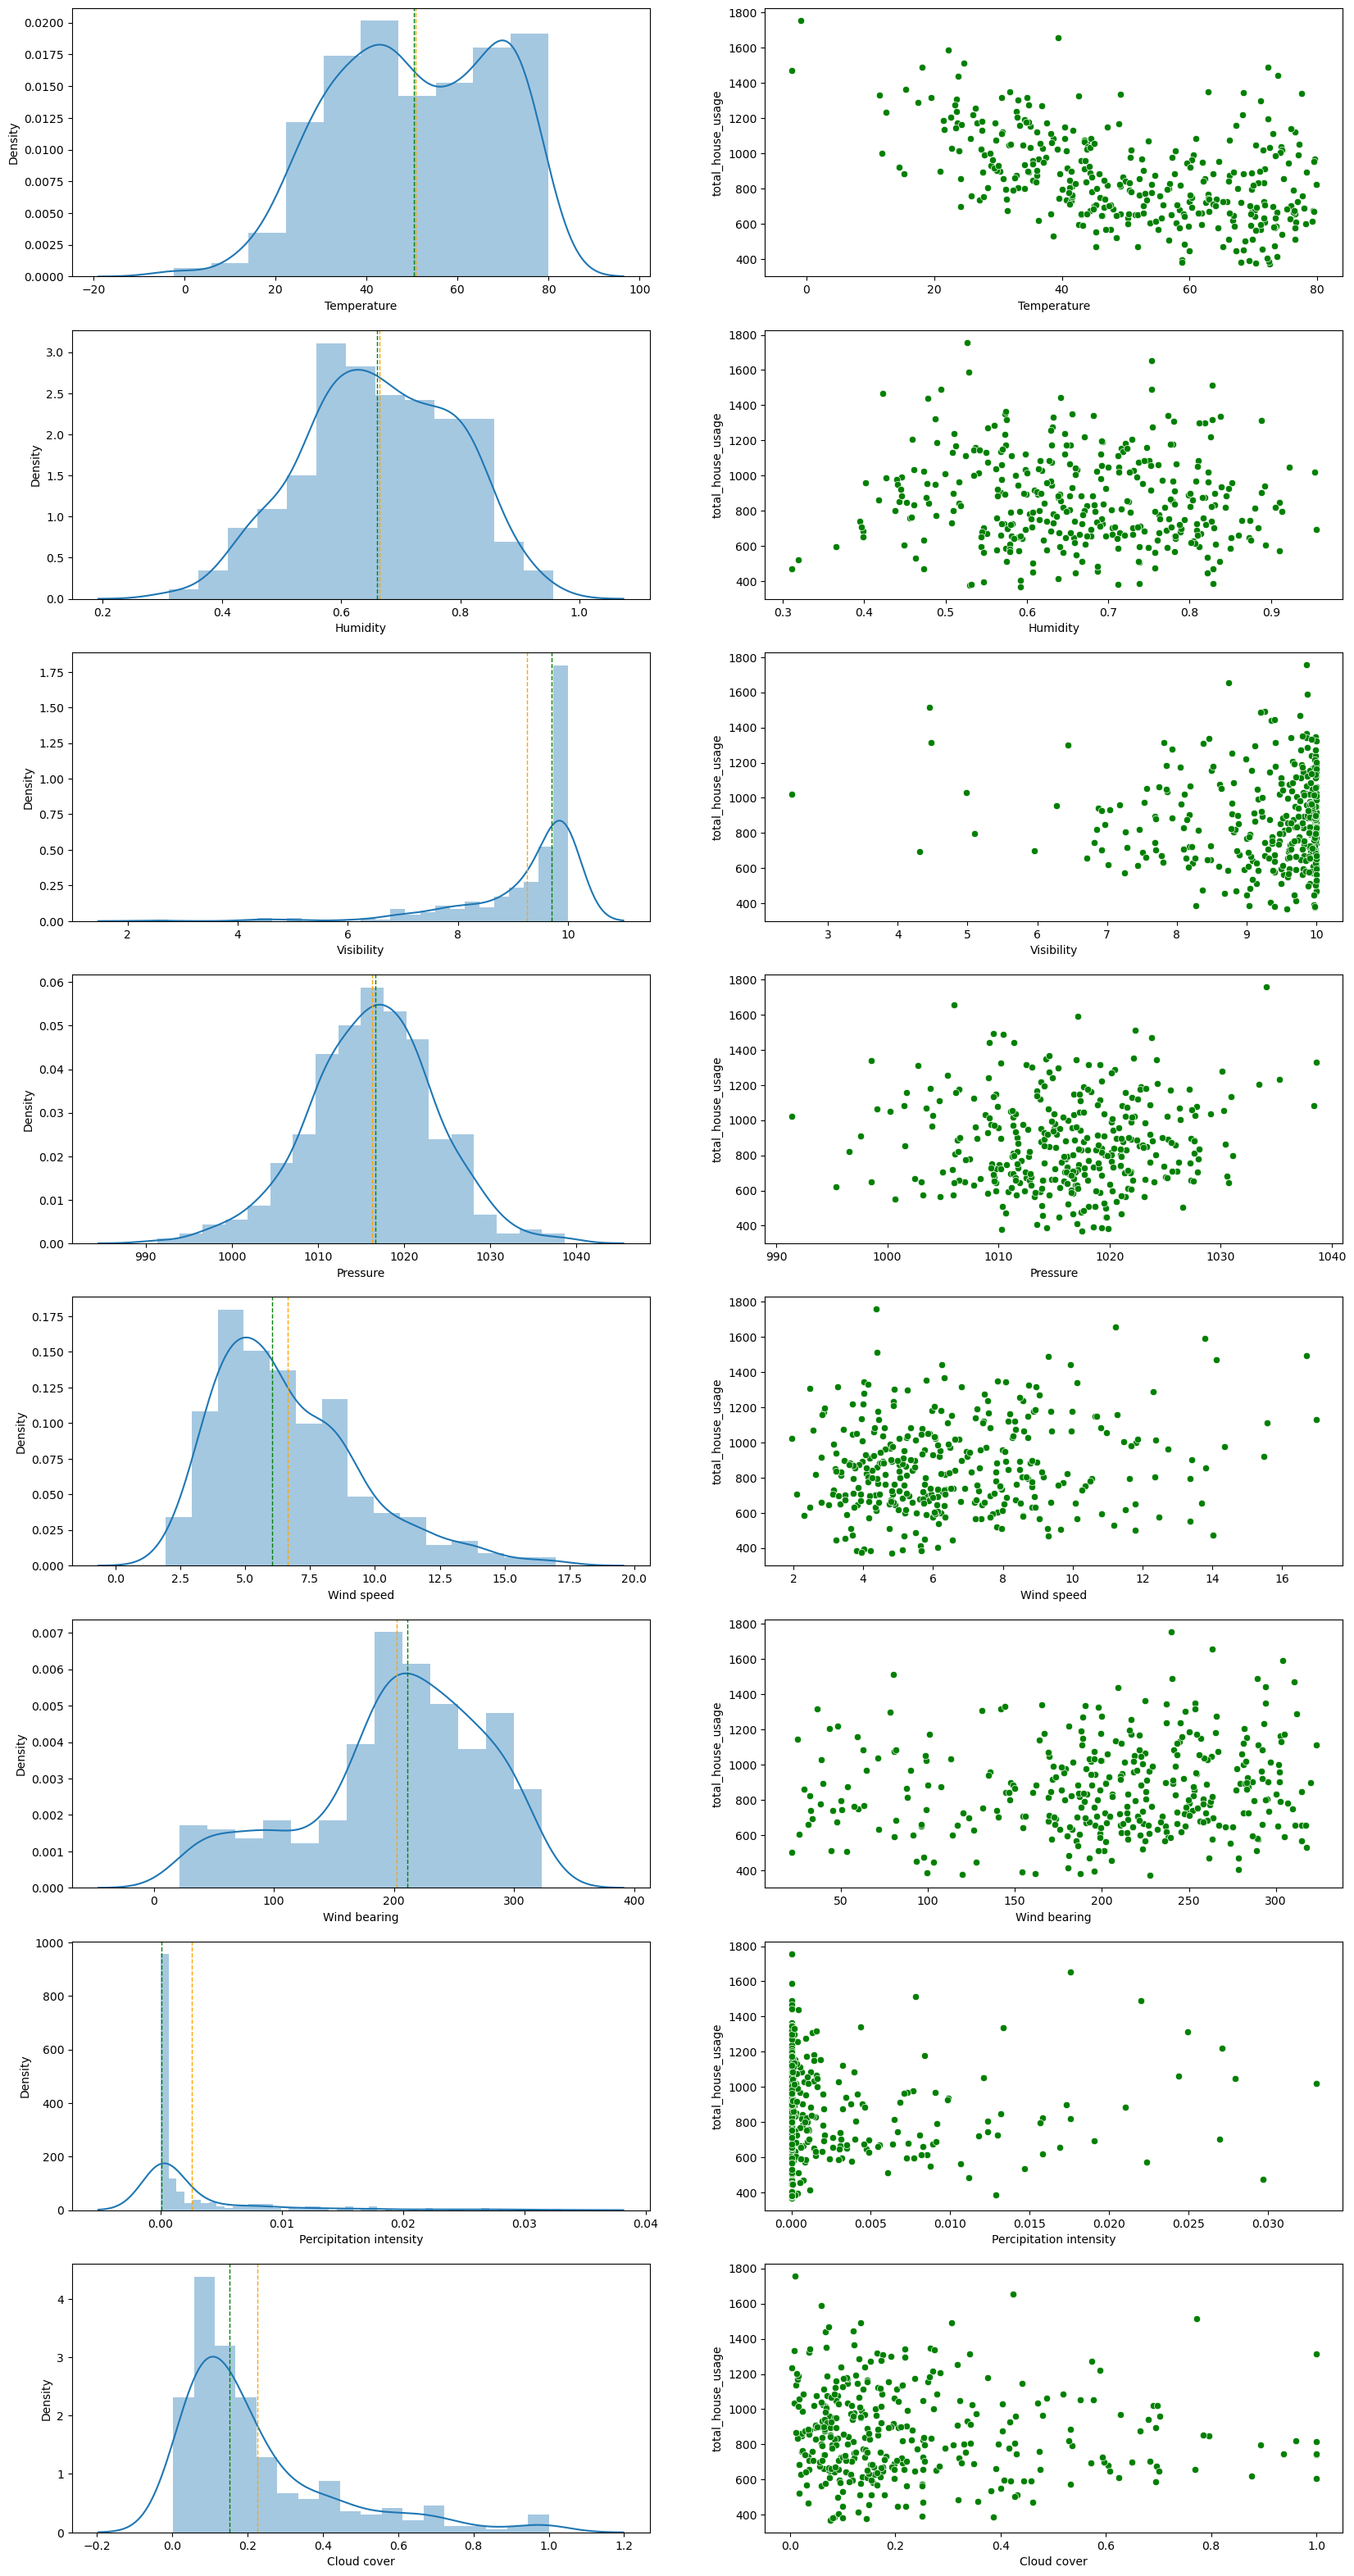

In [27]:
weather_cols= ['Temperature','Humidity', 'Visibility', 'Pressure', 'Wind speed', 'Wind bearing','Percipitation intensity', 'Cloud cover']
n=len(weather_cols)
fig,ax=plt.subplots(len(weather_cols),2,figsize=(20,40))
for i,col in enumerate(weather_cols):
  #univariate of the columns
  dist=sns.distplot(df[col],ax=ax[i,0])
  ax[i,0].axvline(df[col].mean(), color='orange', linestyle='dashed', linewidth=1)
  ax[i,0].axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.scatterplot(data=df,x=col,y='total_house_usage',color='green',ax=ax[i,1]);


In [28]:
df[['total_house_usage']+weather_cols].corr()

total_house_usage  Temperature  Humidity  Visibility  \
total_house_usage                 1.000000    -0.491184 -0.060735   -0.043779   
Temperature                      -0.491184     1.000000  0.211265    0.102466   
Humidity                         -0.060735     0.211265  1.000000   -0.637762   
Visibility                       -0.043779     0.102466 -0.637762    1.000000   
Pressure                          0.053773    -0.170152 -0.202389    0.198120   
Wind speed                        0.141087    -0.284554 -0.352010    0.198732   
Wind bearing                      0.105005    -0.125749 -0.340713    0.280002   
Percipitation intensity          -0.009054     0.077076  0.487915   -0.535483   
Cloud cover                      -0.061185    -0.077962  0.599122   -0.630405   

                         Pressure  Wind speed  Wind bearing  \
total_house_usage        0.053773    0.141087      0.105005   
Temperature             -0.170152   -0.284554     -0.125749   
Humidity                -0.202389   -0.352010     -0.340713   
Visibility               0.198120    0.198732      0.280002   
Pressure                 1.000000   -0.291598     -0.186306   
Wind speed              -0.291598    1.000000      0.353967   
Wind bearing            -0.186306    0.353967      1.000000   
Percipitation intensity -0.328622   -0.004370     -0.202731   
Cloud cover             -0.341373    0.036114     -0.334223   

                         Percipitation intensity  Cloud cover  
total_house_usage                      -0.009054    -0.061185  
Temperature                             0.077076    -0.077962  
Humidity                                0.487915     0.599122  
Visibility                             -0.535483    -0.630405  
Pressure                               -0.328622    -0.341373  
Wind speed                             -0.004370     0.036114  
Wind bearing                           -0.202731    -0.334223  
Percipitation intensity                 1.000000     0.561872  
Cloud cover                             0.561872     1.000000

- Temprature
    - The histogram shows that the temperature is roughly normally distributed.
    - The histogram shows a bimodal distribution of temperature, with two peaks at around 40 degrees Fahrenheit and 70 degrees Fahrenheit.
    - The two peaks are roughly equal in height, which suggests that the two groups of data points are of similar size.
    - There is a strong negative correlation between temperature and total_house_usage. This means that as temperature increases, total_house_usage tends to decrease. This is likely because people use less energy to heat their homes during hot weather.

- Humidity
    - The distribution is approximately normal
    - The scatter plot also shows a weak negative correlation between humidity and total house usage.
    - There is a lot of scatter in the data, which means that there are many exceptions to the general trend.

- Visibility
    - The histogram is skewed to the left, and the orange line (mean) is less than the green line (median). This indicates that the distribution is negatively skewed, with more values concentrated on the high end.
    - the majority of visibility values are concentrated within a relatively narrow range.
    - The scatter plot also shows a weak negative correlation between visibility and total house usage. This means that as visibility increases, total house usage tends to decrease slightly.
    - The scatter plot shows that there is a small group of homes with high visibility and low total house usage. These homes could be energy efficient homes with solar panels or other energy-saving features.

- Pressure
    -  The distribution is approximately normal
    -  The histogram also shows that the majority of pressure values are between 1010 and 1030. This suggests that the pressure is relatively stable and does not vary widely.
    -  The scatter plot shows a weak positive correlation between the two variables, meaning that as pressure increases, total house usage also tends to increase.
    -  The scatter plot also shows that there is a lot of variation in the relationship between pressure and total house usage

- Wind Speed
    - The mean (orange line) is slightly higher than the median (green line), which suggests that the distribution is slightly skewed to the right. This is consistent with the observation from the previous analysis that there are a few outliers with wind speeds above 17.5 units.
    - The mean and median are both close to the most common wind speed (7.0 units), which suggests that the distribution is relatively symmetrical.
    - The scatter plot shows that the relationship between wind speed and total house usage is not perfectly linear. However, there is a clear upward trend, suggesting that total house usage generally increases with wind speed.
    - The mean and median wind speeds are both close to the center of the scatter plot, suggesting that the majority of data points are clustered around these values.

- Wind bearing
    - Based on the histogram on the left, the wind bearing is mostly distributed between 100 and 200 degrees, with a peak at around 150 degrees. There is a smaller peak at around 300 degrees. The distribution is skewed to the right, with a longer tail on the right side. This indicates that there are more instances of wind bearing above 200 degrees than below 100 degrees.
    - The scatter plot on the right shows there is a weak positive correlation between the two variables, meaning that as the wind bearing increases, the total house usage also tends to increase. However, the correlation is not very strong, as there are many outliers that do not fit the trend.
    - The scatter plot shows that there are a few outliers that do not fit the trend. These outliers could be caused by factors such as changes in temperature, humidity, or occupancy levels.

- Precipitation intensity
    - The most frequent precipitation intensity is around 0.01-0.015. The precipitation intensity decreases as the intensity increases. There are a few outliers with precipitation intensity above 0.03.
    - There is a very weak negative correlation between precipitation intensity and total house usage. This means that as precipitation intensity increases, total house usage slightly decreases.

- Cloud cover
    - The cloud cover is distributed relatively evenly, with most values between 0 and 1.
    - There is a slight increase in the frequency of cloud cover values between 0.6 and 0.8.
    - This suggests that there is a slightly higher probability of having cloud cover between 0.6 and 0.8 than at other values.
    - Scatter plot shows a low negative correlation between cloud cover and total house usage. This means that as cloud cover increases, total house usage tends to decrease.


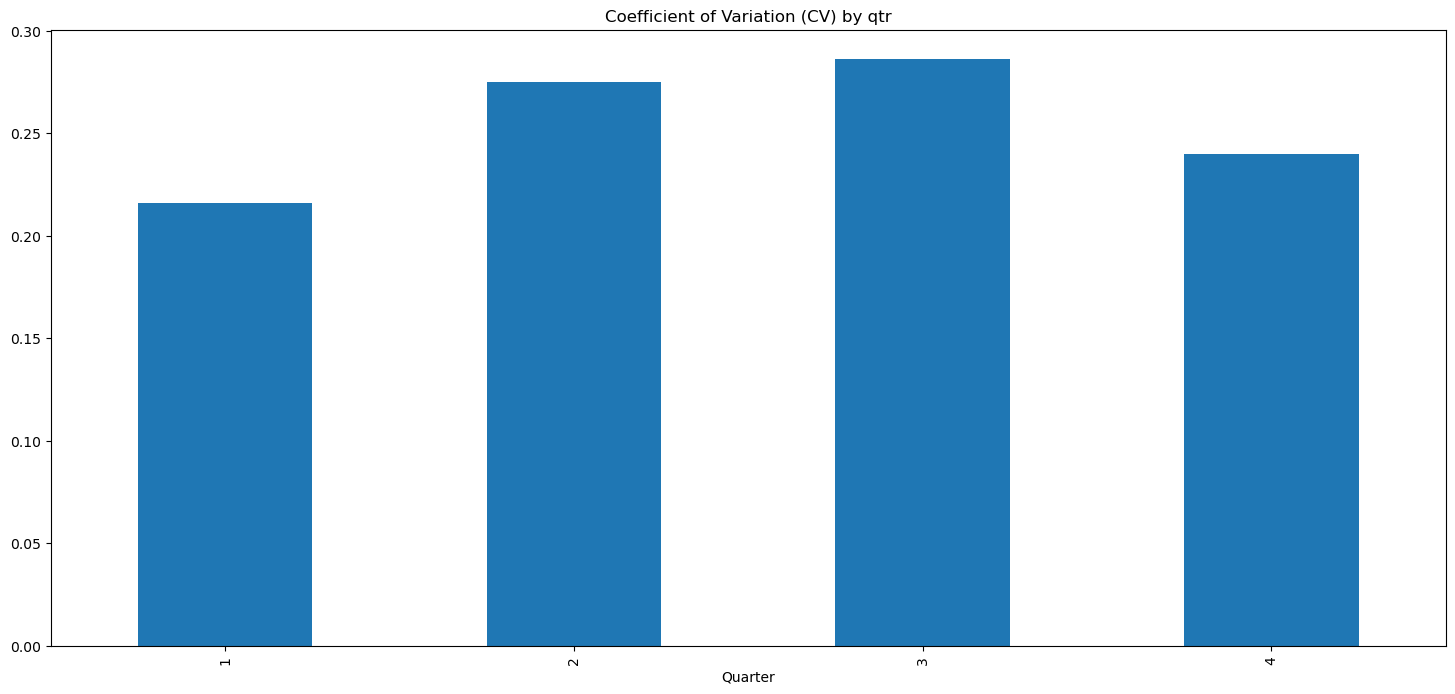

In [29]:
df.groupby("Quarter")['total_house_usage'].std().divide(df.groupby("Quarter")['total_house_usage'].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by qtr")
plt.show()

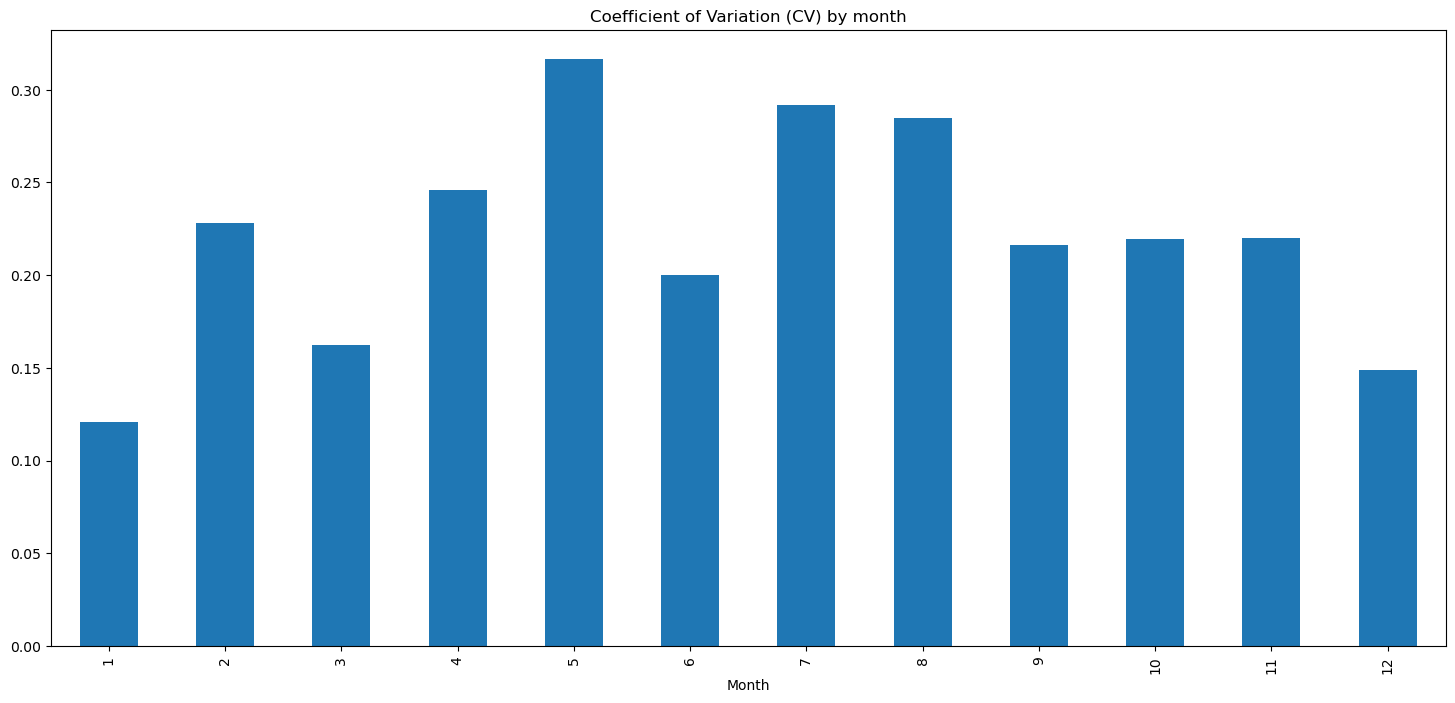

In [30]:
df.groupby("Month")['total_house_usage'].std().divide(df.groupby("Month")['total_house_usage'].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by month")
plt.show()

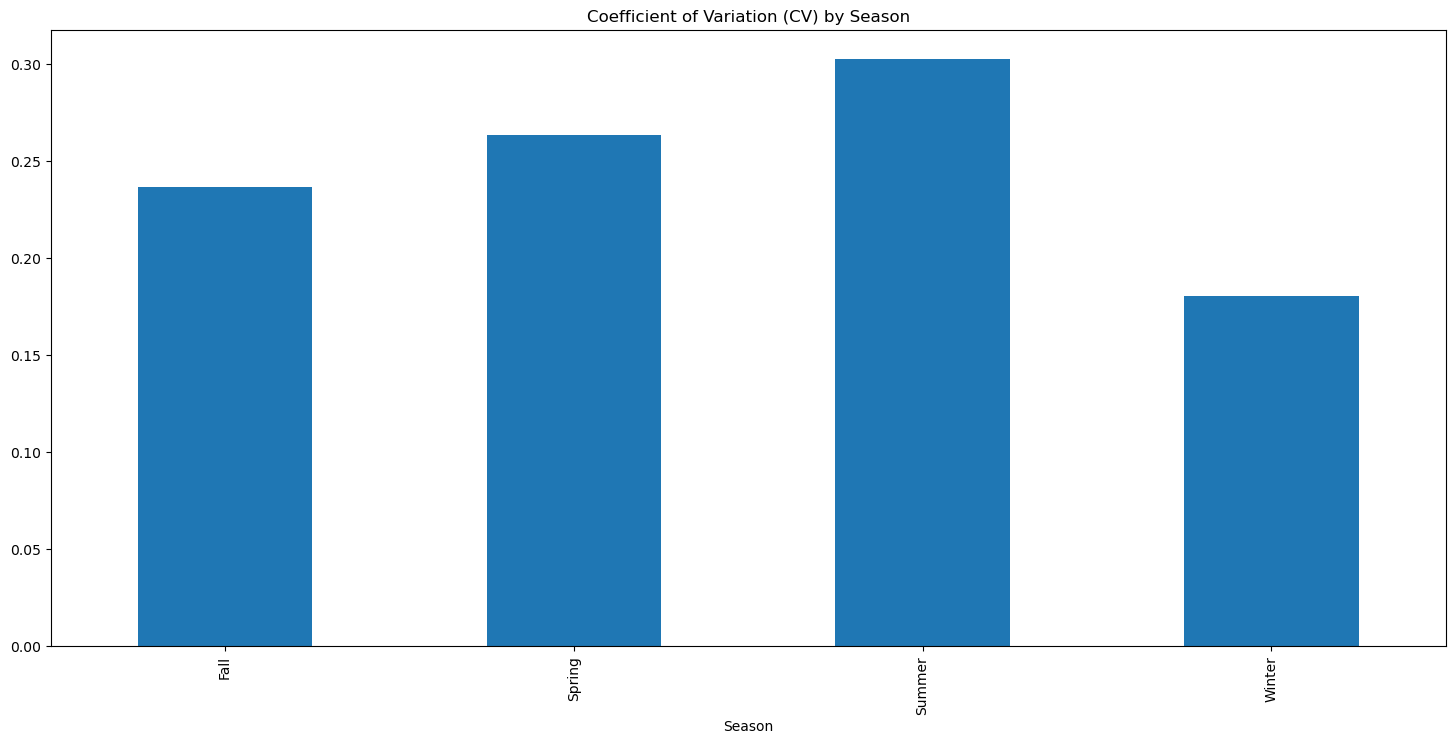

In [31]:
df.groupby("Season")['total_house_usage'].std().divide(df.groupby("Season")['total_house_usage'].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by Season")
plt.show()

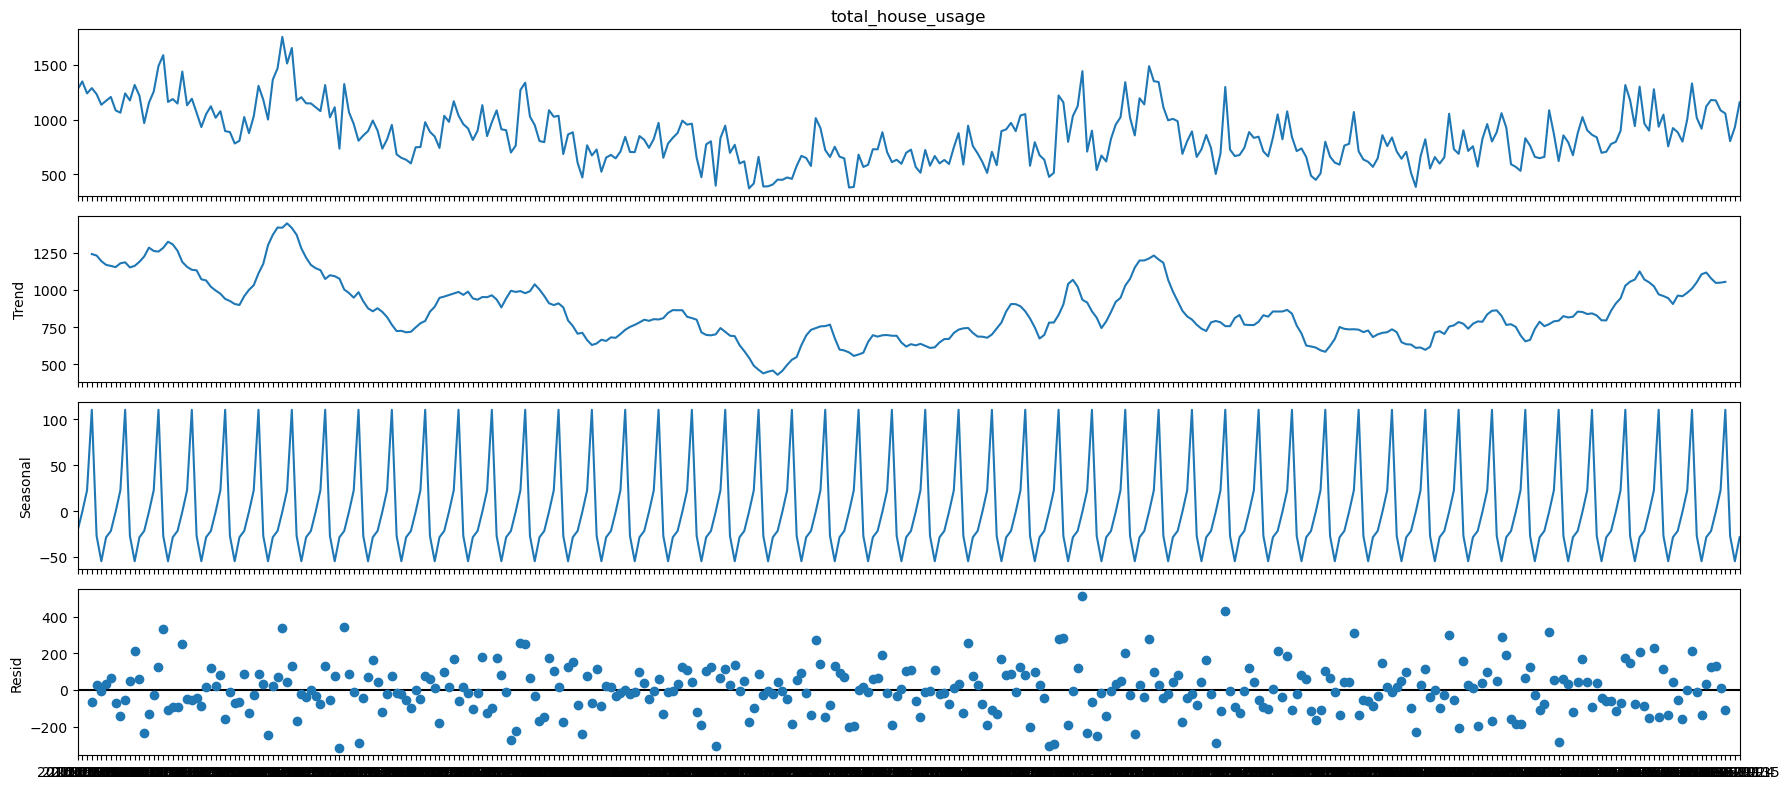

In [32]:
decomposition = sm.tsa.seasonal_decompose(df['total_house_usage'], model='additive', period=7)
fig = decomposition.plot()
plt.show()

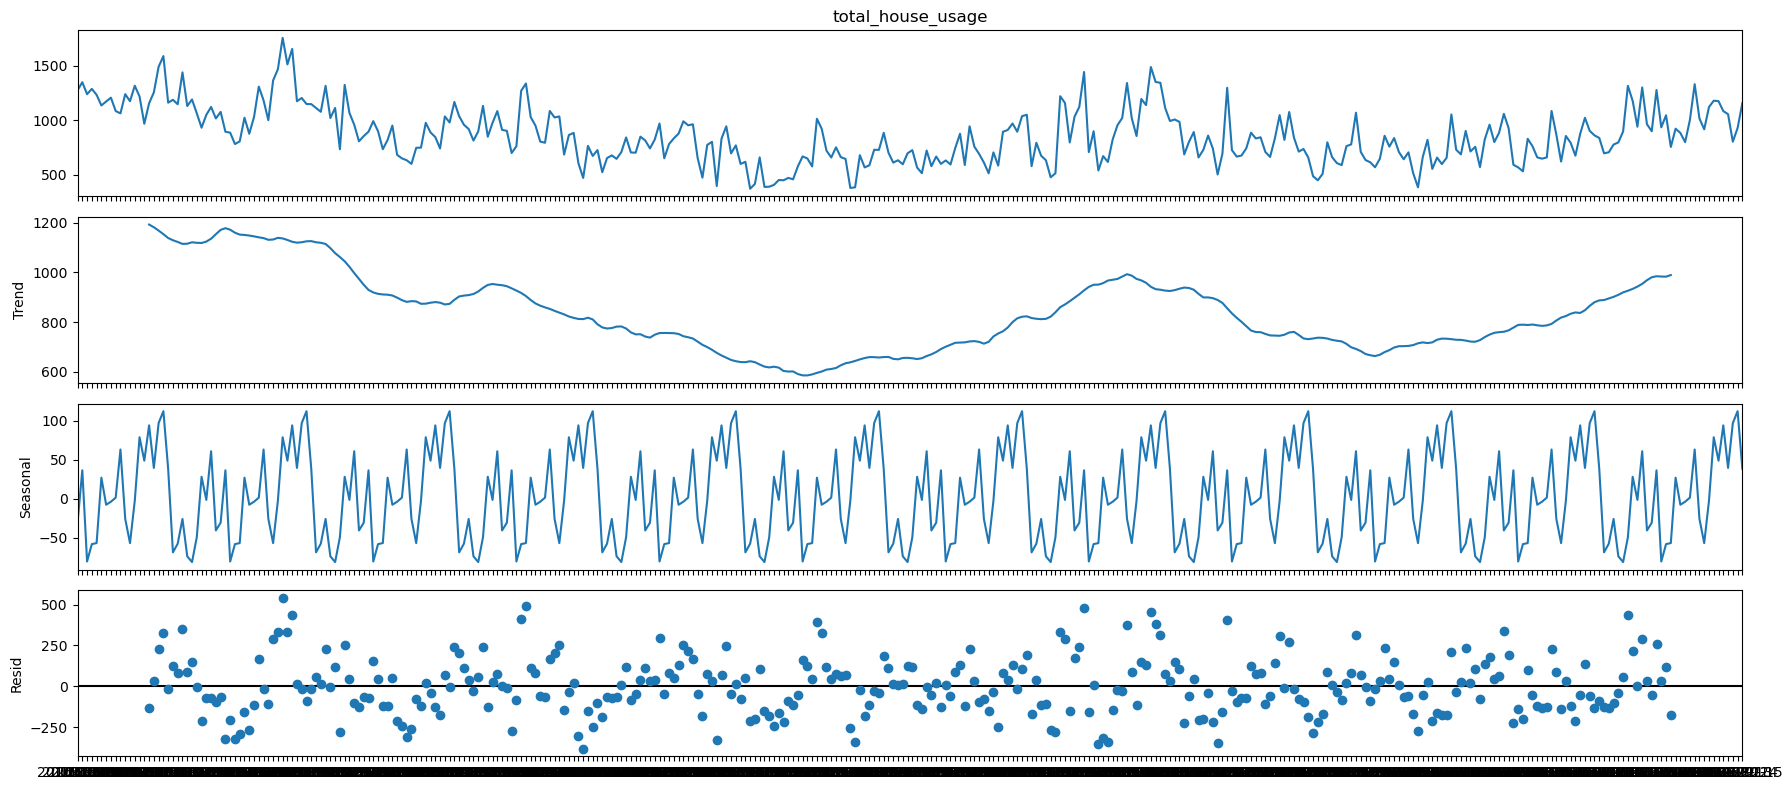

In [33]:
decomposition = sm.tsa.seasonal_decompose(df['total_house_usage'], model='additive', period=30)
fig = decomposition.plot()
plt.show()

In the case of the two plotsthat you shared, the plot with a period of 30 days shows a more pronounced seasonal pattern. The residual component of the plot is also smaller, indicating that the model is better able to fit the data. Additionally, the monthly seasonal pattern is more consistent with our knowledge of the underlying system (i.e., many households and businesses are billed for their usage on a monthly basis). Therefore, I would conclude that the seasonality in your data is monthly.
However, it is important to note that both plots show some evidence of both weekly and monthly seasonality. This is not uncommon, as many time series data sets exhibit multiple seasonal patterns.


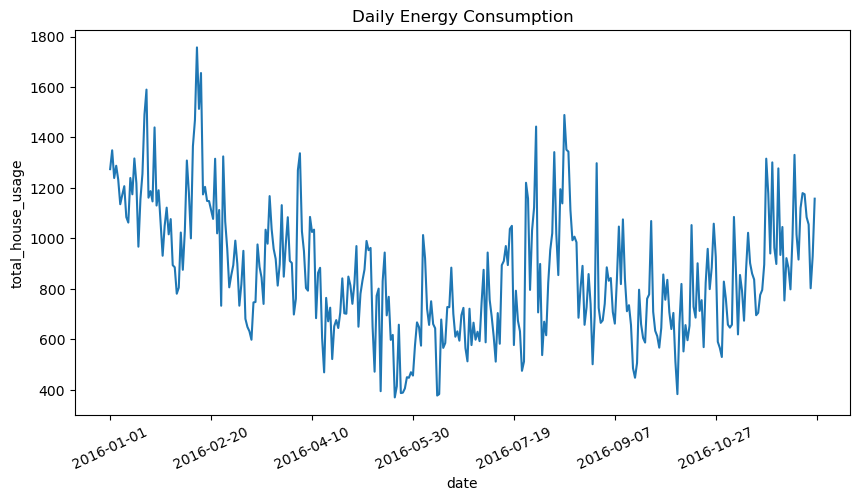

Test Statistic: -4.365229535031139
p-value: 0.00034183652847429984
The time series is stationary (reject the null hypothesis).


In [34]:
daily_energy = df['total_house_usage']
plt.figure(figsize=(10, 5))
daily_energy.plot()
plt.title('Daily Energy Consumption')
plt.ylabel("total_house_usage")
plt.xticks(rotation = 25)
plt.show()

# Assuming df is your DataFrame with daily data
result = adfuller(df['total_house_usage'])

# Extract and print the test statistic and p-value
test_statistic, p_value, _, _, _, _ = result
print(f'Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")

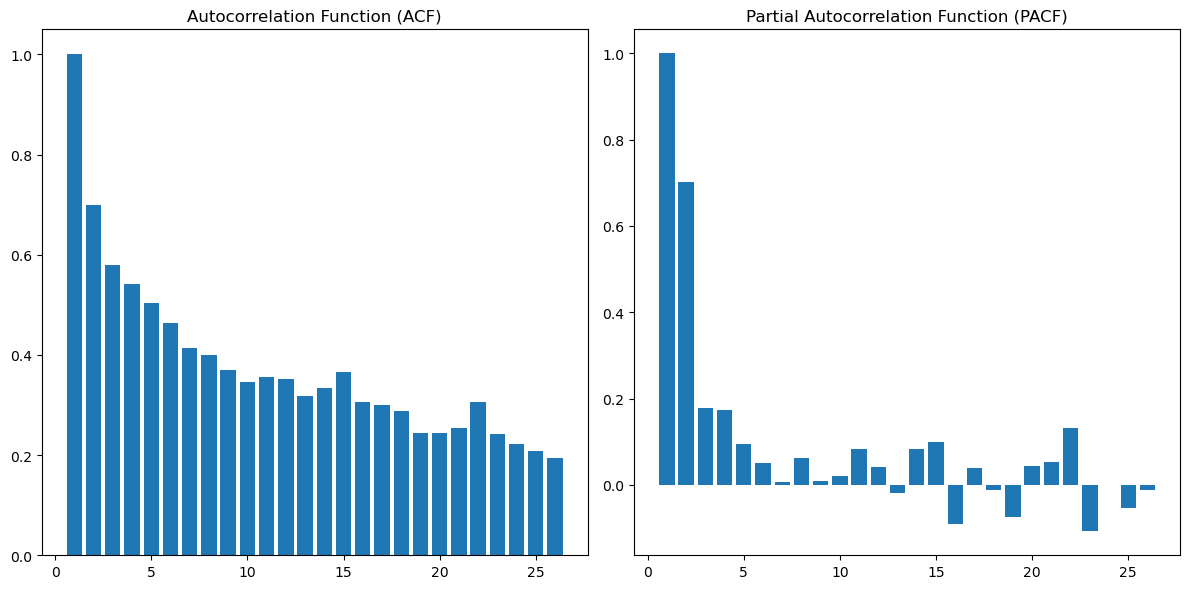

In [35]:
# Calculate ACF and PACF
acf = sm.tsa.acf(df['total_house_usage'], fft=False)
pacf = sm.tsa.pacf(df['total_house_usage'])

# Create subplots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(1, len(acf) + 1), acf)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plt.bar(range(1, len(pacf) + 1), pacf)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

/var/folders/5j/rdrh_7zd3vxb2603cjtgfwnc0000gn/T/ipykernel_83528/4158159617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_house_usage)


<Axes: xlabel='total_house_usage', ylabel='Density'>

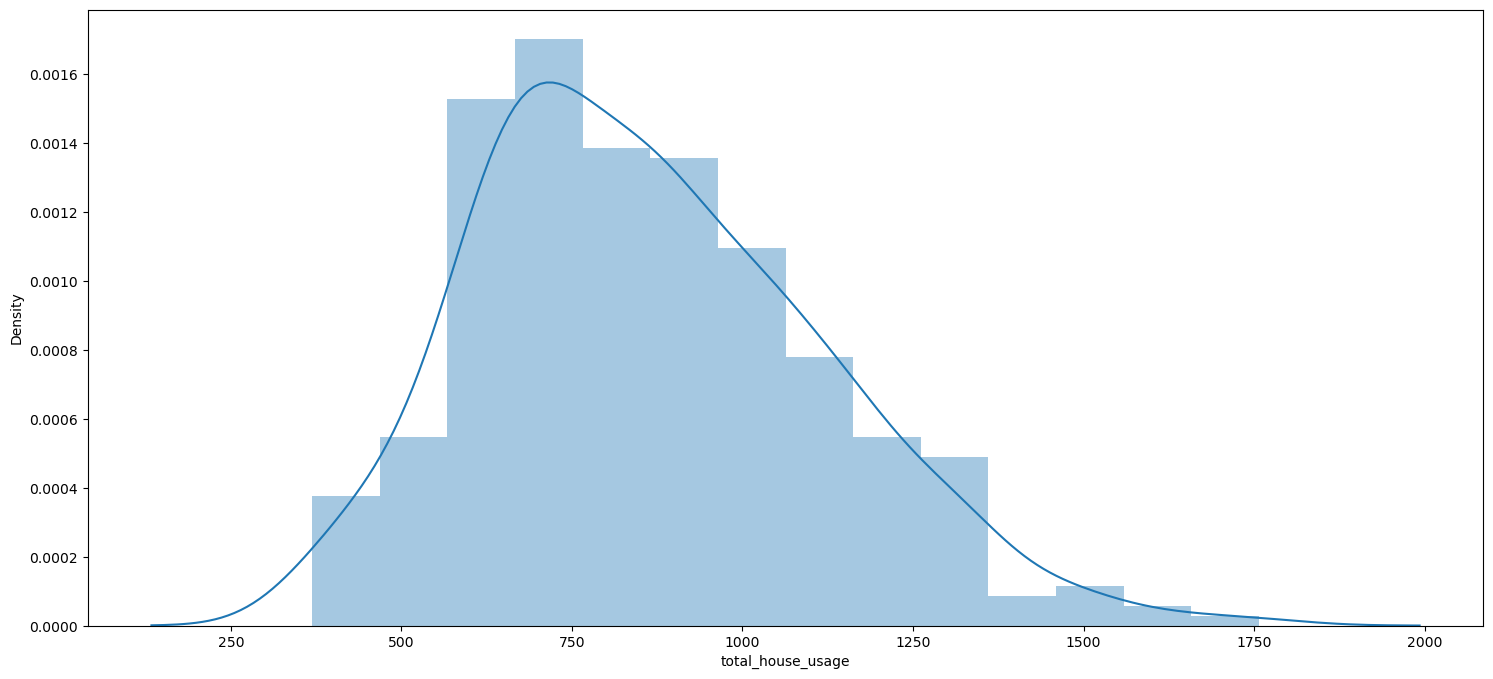

In [36]:
sns.distplot(df.total_house_usage)

/var/folders/5j/rdrh_7zd3vxb2603cjtgfwnc0000gn/T/ipykernel_83528/553318176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df.total_house_usage))


<Axes: xlabel='total_house_usage', ylabel='Density'>

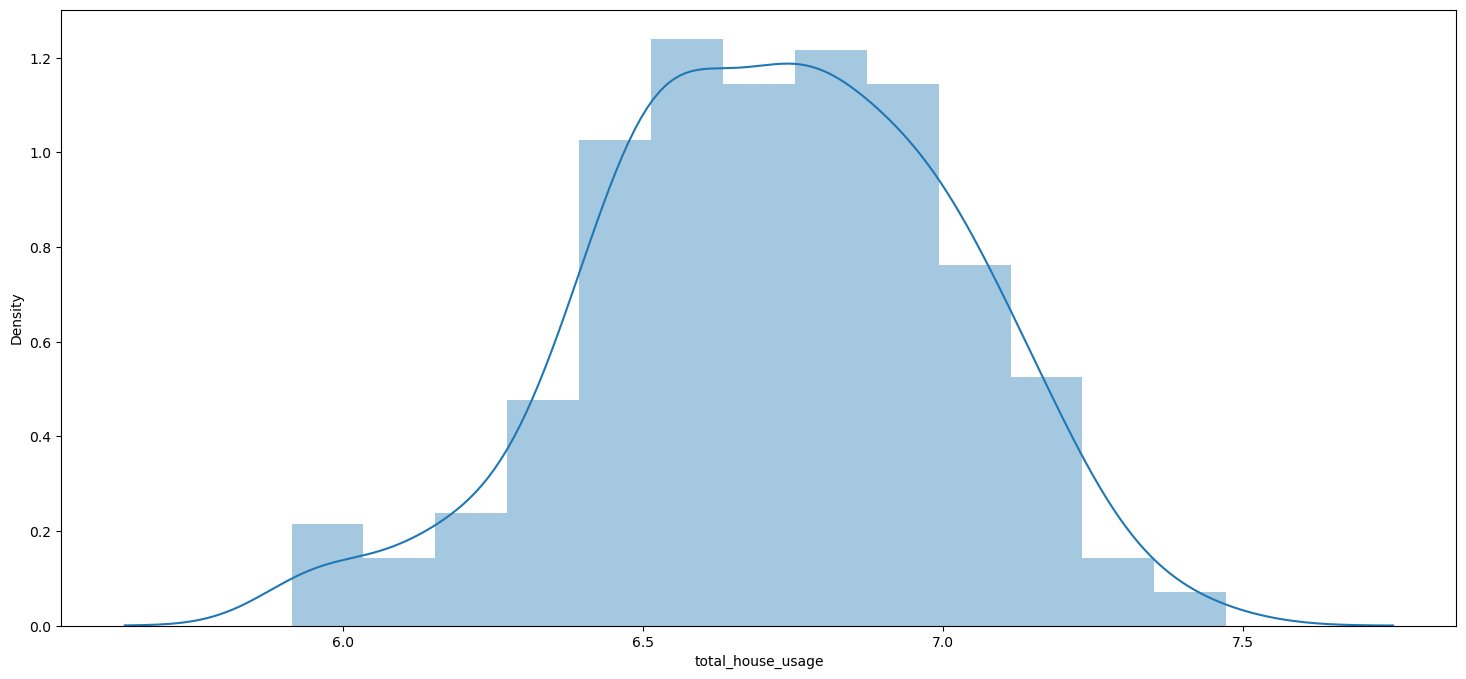

In [37]:
sns.distplot(np.log1p(df.total_house_usage))

In [38]:
shapiro_test(np.log1p(df.total_house_usage), alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 0.056882865726947784 is higher than significance level: 0.05, therefore null hypothesis cannot be rejected


In [39]:
df['total_house_usage_log']= np.log1p(df['total_house_usage'])

In [40]:
df.head(2)

Dishwasher  Home office      Fridge  Wine cellar  Garage door  \
date                                                                        
2016-01-01   90.702557   144.769717  111.682933    31.257550    19.048300   
2016-01-02   85.025519   155.771717   94.898667    24.075917    19.220983   

                  Barn       Well  Microwave  Living room    Furnace  ...  \
date                                                                  ...   
2016-01-01  111.661367  35.580433   18.31875    99.103450  594.06795  ...   
2016-01-02  185.617650  34.463667    8.94735    73.505583  651.61220  ...   

            movstd_90  movave_365  movstd_365  Season  Appliances  is_holiday  \
date                                                                            
2016-01-01        NaN         NaN         NaN  Winter  833.820490           1   
2016-01-02        NaN         NaN         NaN  Winter  859.704719           0   

            q10  q50  q90  total_house_usage_log  
date                                              
2016-01-01  NaN  NaN  NaN               7.150878  
2016-01-02  NaN  NaN  NaN               7.207855  

[2 rows x 41 columns]

In [41]:
# Create a DataFrame for the ARIMA model
arima_df = df[['total_house_usage','total_house_usage_log']]

In [42]:
print (df.columns.tolist())

['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'total_house_usage', 'Temperature', 'Humidity', 'Visibility', 'Pressure', 'Wind speed', 'Wind bearing', 'Percipitation intensity', 'Cloud cover', 'Summary', 'Month', 'Day', 'Weekday', 'is_weekend', 'Quarter', 'movave_7', 'movstd_7', 'movave_30', 'movstd_30', 'movave_90', 'movstd_90', 'movave_365', 'movstd_365', 'Season', 'Appliances', 'is_holiday', 'q10', 'q50', 'q90', 'total_house_usage_log']


In [43]:
drop_cols= ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 
            'Kitchen', 'movave_7', 'movstd_7', 'movave_30', 'movstd_30', 'movave_90', 'movstd_90', 'movave_365', 'movstd_365', 'Appliances', 
             'q10', 'q50', 'q90',
           ]
rf_df = df.drop(drop_cols,axis=1)

In [44]:
rf_df.columns

Index(['total_house_usage', 'Temperature', 'Humidity', 'Visibility',
       'Pressure', 'Wind speed', 'Wind bearing', 'Percipitation intensity',
       'Cloud cover', 'Summary', 'Month', 'Day', 'Weekday', 'is_weekend',
       'Quarter', 'Season', 'is_holiday', 'total_house_usage_log'],
      dtype='object')

In [45]:
arima_df.to_csv('/Users/vibhu_goel/Documents/Thesis/data/arima_data.csv')

In [46]:
rf_df.to_csv('/Users/vibhu_goel/Documents/Thesis/data/rf_data.csv')